## Practice 2

### Víctor Galván Fraile

<img src="./enunciados 1.png" style="height: 500px;"/>

In [179]:
#Primero, importamos todos los paquetes necesarios.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
import netCDF4 as nc
from scipy import stats as sts
from scipy import signal
from scipy.fft import fft 
from statsmodels.tsa import stattools 
from cartopy import crs as ccrs # Cartography library
import cartopy as car
import cmocean as cmo #Oceanographic library for colormaps
import plotly as plty
import matplotlib.patches as mpatches
import cartopy.io.img_tiles as cimgt

Una vez hecho esto, se procede a obtener los datos. Además, la región de estudio de este trabajo radica en el sur de la Península Ibérica, concretamente:

**Sur=region2(-8, 0, 36, 38)**

In [180]:
path= r'C:/Users/ideapad 5 15ITL05/Desktop/Meteo UCM/1 cuatrimestre/Analisis de datos en meteorologia/Practica 2/'
data_max= r'Datos/tmax_pen.nc'
data_min= r'Datos/tmin_pen.nc'


In [181]:
max_data= xr.open_dataset(path+data_max)
min_data= xr.open_dataset(path+data_min)
max_data

<xarray.Dataset>
Dimensions:  (lon: 230, lat: 190, Time: 41638)
Coordinates:
  * lon      (lon) float64 -9.673 -9.614 -9.556 -9.497 ... 3.607 3.665 3.724
  * lat      (lat) float64 44.17 44.12 44.08 44.03 ... 35.8 35.75 35.71 35.66
  * Time     (Time) datetime64[ns] 1901-01-02 1901-01-03 ... 2015-01-01
Data variables:
    tx       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily maximum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, maximum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

Lo siguiente que hacemos, con objeto de ahorrar mucha memoria, es reducir los datasets a la región que nos interesa

In [182]:
lat_lims= [38,36]
lon_lims= [-8,0]

max_data_red= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
min_data_red= min_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
lat_red= max_data_red.lat
lon_red= max_data_red.lon
min_data_red

<xarray.Dataset>
Dimensions:  (lon: 137, lat: 44, Time: 14611)
Coordinates:
  * lon      (lon) float64 -7.976 -7.918 -7.859 ... -0.1371 -0.07858 -0.02008
  * lat      (lat) float64 37.96 37.91 37.87 37.82 ... 36.16 36.11 36.07 36.02
  * Time     (Time) datetime64[ns] 1975-01-01 1975-01-02 ... 2015-01-01
Data variables:
    tn       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily minimum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, minimum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

In [183]:
#Para mejorar el esutdio y poder comparar, se procede a dividir este periodo en dos: (1975-1994) y (1995-2015)
max_data_red_1= max_data_red.sel(Time=slice('1975','1994'))
max_data_red_2= max_data_red.sel(Time=slice('1995','2015'))
min_data_red_1= min_data_red.sel(Time=slice('1975','1994'))
min_data_red_2= min_data_red.sel(Time=slice('1995','2015'))
min_data_red_2

<xarray.Dataset>
Dimensions:  (lon: 137, lat: 44, Time: 7306)
Coordinates:
  * lon      (lon) float64 -7.976 -7.918 -7.859 ... -0.1371 -0.07858 -0.02008
  * lat      (lat) float64 37.96 37.91 37.87 37.82 ... 36.16 36.11 36.07 36.02
  * Time     (Time) datetime64[ns] 1995-01-01 1995-01-02 ... 2015-01-01
Data variables:
    tn       (Time, lat, lon) float32 ...
Attributes: (12/13)
    title:             Daily minimum temperature of peninsular Spain
    history:           version 1.0
    keywords:          daily, minimum temperature, peninsular Spain, Spain
    creator_name:      Roberto Serrano-Notivoli; Martin de Luis; Santiago Beg...
    maintainer_name:   Roberto Serrano-Notivoli
    maintainer_email:  rs@unizar.es
    ...                ...
    processing_level:  Quality-controlled. Final values.
    acknowledgment:    This study was supported by research projects financed...
    units:             Celsius degrees
    id:                STEAD
    sources:           AEMET and MAGRAMA
    naming_authority:  Spanish TEmperature At Daily scale

In [184]:
min_data_red_2.tn.lat

<xarray.DataArray 'lat' (lat: 44)>
array([37.959965, 37.914965, 37.869965, 37.824965, 37.779965, 37.734965,
       37.689965, 37.644965, 37.599965, 37.554965, 37.509965, 37.464965,
       37.419965, 37.374965, 37.329965, 37.284965, 37.239965, 37.194965,
       37.149965, 37.104965, 37.059965, 37.014965, 36.969965, 36.924965,
       36.879965, 36.834965, 36.789965, 36.744965, 36.699965, 36.654965,
       36.609965, 36.564965, 36.519965, 36.474965, 36.429965, 36.384965,
       36.339965, 36.294965, 36.249965, 36.204965, 36.159965, 36.114965,
       36.069965, 36.024965])
Coordinates:
  * lat      (lat) float64 37.96 37.91 37.87 37.82 ... 36.16 36.11 36.07 36.02
Attributes:
    units:      degrees_north
    long_name:  lat
    axis:       Y

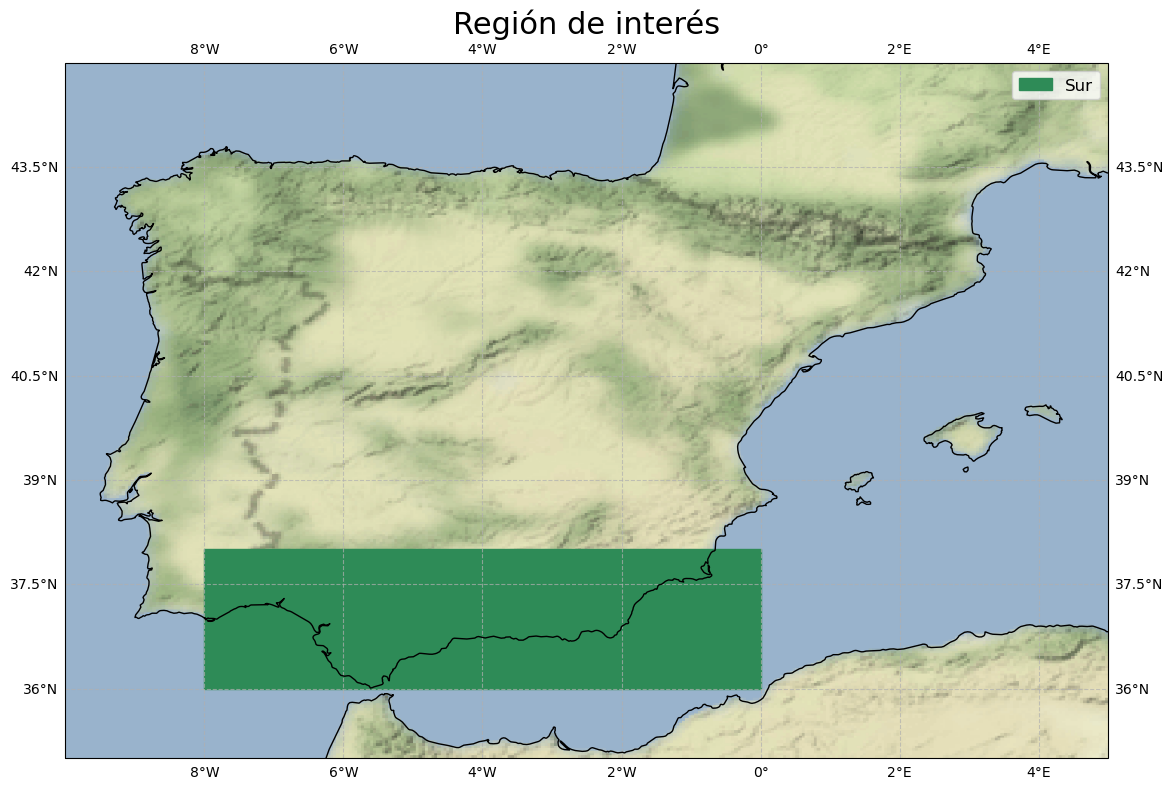

In [185]:
# Vamos a pintar las regiones en un mapa para verlas mejor


plt.style.use('default') # Estilo general
fig, ax = plt.subplots(figsize=(16, 8), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()

stamen_terrain = cimgt.Stamen('terrain-background')
zoom = 5
ax.add_image(stamen_terrain, zoom)

ax.set_global() # added following an answer to my question

ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)
def pinta_region(lats,lons,color,ax=ax,label=None): #Codigo de Diego
    lat_corners = np.array([lats[0], lats[0],lats[1], lats[1]])
    lon_corners = np.array([ lons[0], lons[1], lons[1], lons[0]])
    poly_corners = np.zeros((len(lat_corners), 2), np.float64)
    poly_corners[:,0] = lon_corners
    poly_corners[:,1] = lat_corners
    poly = mpatches.Polygon(poly_corners, closed=True, ec=color, fill=True, lw=1, fc=color,label=label)#, transform=ccrs.Geodetic())
    ax.add_patch(poly)

#los,las= np.meshgrid(lon_red,lat_red)
ax.set_title('Región de interés',size=22)
pinta_region([38,36],[-8,0],'seagreen',ax,label='Sur')
ax.legend(prop={'size':12})
ax.set_extent([-10,5,35,45])
#ax.plot(los,las,'k.') #para pintar la malla de puntos de los cuales hay datos
plt.tight_layout()
fig.savefig('Regiones.png',dpi=500,facecolor='w')

In [186]:
path_stations= r"C:\Users\ideapad 5 15ITL05\Desktop\Meteo UCM\1 cuatrimestre\Analisis de datos en meteorologia\Repaso python\Dia 3\isd-history.csv"
stations=pd.read_csv(path_stations)
stations[stations['CTRY']== 'SP']

USAF   WBAN   STATION NAME CTRY STATE  ICAO     LAT     LON  ELEV(M)  \
2838   080010  99999      LA CORUNA   SP   NaN   NaN  43.367  -8.417     67.0   
2839   080020  99999       A CORUNA   SP   NaN  LECO  43.302  -8.377     98.5   
2840   080030  99999   MONTEVENTOSO   SP   NaN   NaN  43.483  -8.317    240.0   
2841   080050  99999      EL FERROL   SP   NaN   NaN  43.483  -8.233      9.0   
2842   080070  99999        CERCEDA   SP   NaN   NaN  43.167  -8.533    595.0   
...       ...    ...            ...  ...   ...   ...     ...     ...      ...   
12729  600350  99999  FUERTEVENTURA   SP   NaN  GCFV  28.453 -13.864     25.3   
12730  600400  99999      LANZAROTE   SP   NaN  GCRR  28.945 -13.605     14.3   
12788  603200  99999          CEUTA   SP   NaN   NaN  35.917  -5.350     88.0   
12790  603380  99999        MELILLA   SP   NaN  GEML  35.280  -2.956     47.5   
14949  696694  99999       MORON AB   SP   NaN  KQQQ  37.167  -5.617      NaN   

          BEGIN       END  
2838   19310101  20201004  
2839   19741001  20201004  
2840   19730101  20050211  
2841   19730101  20051112  
2842   20040517  20060207  
...         ...       ...  
12729  19500327  20201004  
12730  19500310  20201004  
12788  19650101  20201004  
12790  19641001  20201004  
14949  19840828  20010222  

[168 rows x 11 columns]

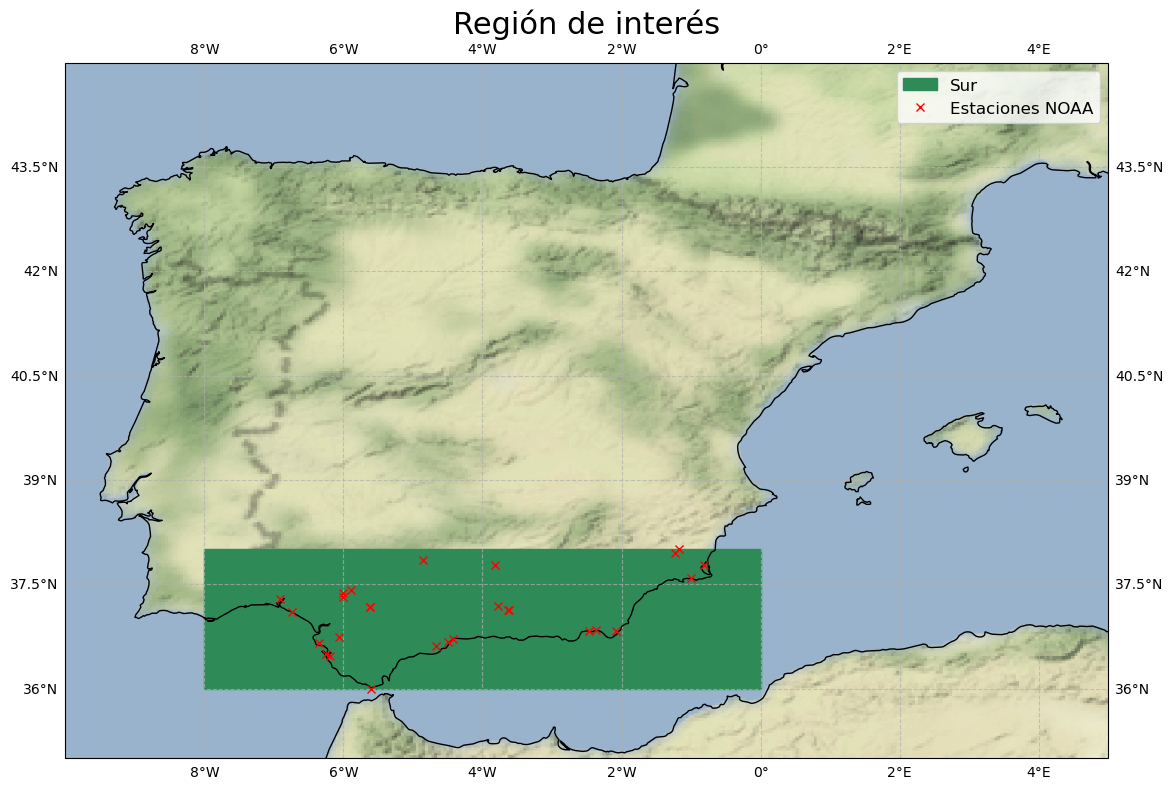

In [187]:
#Veamos aquellas estaciones que están dentrro de la región de estudio
estaciones= stations[(stations['CTRY']== 'SP')&(stations['LAT']>=lat_lims[1])&(stations['LAT']<=lat_lims[0])&(stations['LON']>=lon_lims[0])&(stations['LON']<=lon_lims[1])]
#Pintamos en el mapa anterior estas estaciones de la NOAA
fig, ax = plt.subplots(figsize=(16, 8), ncols=1)
ax=plt.subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()

stamen_terrain = cimgt.Stamen('terrain-background')
zoom = 5
ax.add_image(stamen_terrain, zoom)

ax.set_global() # added following an answer to my question

ax.gridlines(draw_labels = True,linestyle='--',alpha=0.7,zorder=1)

ax.set_title('Región de interés',size=22)
pinta_region([38,36],[-8,0],'seagreen',ax,label='Sur')

ax.set_extent([-10,5,35,45])
ax.plot(estaciones['LON'],estaciones['LAT'],'rx',label='Estaciones NOAA')
plt.tight_layout()
ax.legend(prop={'size':12})
fig.savefig('Regiones.png',dpi=500,facecolor='w')

In [188]:
#Comparemos los datos de una estación y del punto del set de datos más próximo:
estaciones

USAF   WBAN            STATION NAME CTRY STATE  ICAO     LAT    LON  \
2849   080144  99999                 ARMILLA   SP   NaN  LEGA  37.133 -3.636   
2945   083830  99999                  HUELVA   SP   NaN   NaN  37.283 -6.917   
2946   083840  99999           EL ARENOSILLO   SP   NaN   NaN  37.100 -6.733   
2947   083900  99999         SEVILLA/TABLADA   SP   NaN   NaN  37.367 -6.000   
2948   083905  99999        SEVILLA HELIPORT   SP   NaN  LEEC  37.317 -6.000   
2949   083910  99999                 SEVILLA   SP   NaN  LEZL  37.418 -5.893   
2950   083970  99999                MORON AB   SP   NaN  LEMO  37.175 -5.616   
2951   084100  99999                 CORDOBA   SP   NaN  LEBA  37.842 -4.849   
2952   084170  99999                    JAEN   SP   NaN   NaN  37.783 -3.817   
2953   084190  99999                 GRANADA   SP   NaN  LEGR  37.189 -3.777   
2954   084200  99999       GRANADA / ARMILLA   SP   NaN   NaN  37.133 -3.617   
2955   084290  99999            ALCANTARILLA   SP   NaN  LERI  37.951 -1.230   
2956   084300  99999                  MURCIA   SP   NaN   NaN  38.000 -1.167   
2957   084310  99999        CASTILLO GALERAS   SP   NaN   NaN  37.583 -1.000   
2958   084330  99999       MURCIA SAN JAVIER   SP   NaN  LELC  37.775 -0.812   
2959   084490  13025  ROTA NAVAL AIR STATION   SP   NaN  LERT  36.650 -6.350   
2960   084510  99999                   JEREZ   SP   NaN  LEJR  36.745 -6.060   
2962   084520  99999               CADIZ OBS   SP   NaN   NaN  36.500 -6.250   
2963   084530  99999            SAN FERNANDO   SP   NaN   NaN  36.467 -6.200   
2964   084580  99999                  TARIFA   SP   NaN   NaN  36.000 -5.600   
2965   084750  99999      ALHAURIN EL GRANDE   SP   NaN   NaN  36.617 -4.667   
2966   084820  99999                  MALAGA   SP   NaN  LEMG  36.675 -4.499   
2967   084840  99999                  MALAGA   SP   NaN   NaN  36.717 -4.417   
2968   084870  99999                 ALMERIA   SP   NaN  LEAM  36.844 -2.370   
2969   084880  99999                 ALMERIA   SP   NaN   NaN  36.833 -2.467   
2970   084890  99999                   NIJAR   SP   NaN   NaN  36.833 -2.083   
14949  696694  99999                MORON AB   SP   NaN  KQQQ  37.167 -5.617   

       ELEV(M)     BEGIN       END  
2849     700.1  20040525  20201004  
2945      20.0  19730101  20201004  
2946      41.0  20020430  20070307  
2947      14.0  19730101  20051206  
2948       5.0  20070629  20201002  
2949      33.8  19730101  20201004  
2950      86.9  19580102  20201004  
2951      90.5  19730101  20201004  
2952     580.0  19730201  20201004  
2953     566.9  19730101  20201004  
2954     717.0  19730101  20040108  
2955      76.2  19730101  20201004  
2956      62.0  19730101  20201004  
2957     217.0  19730101  20040805  
2958       3.4  19730101  20201004  
2959      25.6  19730101  20201004  
2960      28.3  19730101  20201004  
2962       9.0  19730101  20201004  
2963      30.0  19310103  20201004  
2964      25.0  19730101  20201004  
2965    1147.0  20050604  20051221  
2966      15.8  19730101  20201004  
2967      54.0  19751215  19751215  
2968      21.3  19310102  20201004  
2969       7.0  20020109  20180530  
2970     486.0  20040817  20050221  
14949      NaN  19840828  20010222

In [189]:
#Next, we build up the code of the station (we now it already from the statement of the exercise)
def readDataFrame(stationName):
    url = r"C:\Users\ideapad 5 15ITL05\Desktop\Meteo UCM\1 cuatrimestre\Analisis de datos en meteorologia\Repaso python\Dia 3\isd-history.csv"
    c=pd.read_csv(url)

    #Seleccionamos los años de inicio y final de lectura
    yearInit = 1975
    yearEnd = 2016

    #Construimos el código que necesitamos para bajar los datos de la estación:
    station=str(c.loc[(c['STATION NAME']==stationName)]['USAF'].values[0]) + '-' + \
            str(c.loc[(c['STATION NAME']==stationName)]['WBAN'].values[0])
    print('Seleccionada la estacion ' + stationName + ' con código ' + station)

    #Definimos las columnas y el tipo de dato que va a tener el DataFrame donde vamos a alojar los datos de la estación
    colNames=['year','month','day','hour','temp','tempd','slp','windDir','windSpeed','cloud','pcp1h','pcp6h']
    dataType=['int','int','int','int','float','float','int','int','int','int','int','int',]

    #Definimos los límites de los caractéres donde están los datos en los archivos que vamos a leer 
    #(Esta información está en: https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/isd-lite-format.txt)
    limits=[(0,4),(5,7),(8,10),(11,13),(14,19),(20,25),(26,31),(32,37),(38,43),(44,49),(50,55),(56,61)]
    
    #Lectura de los datos:
    isd_data=pd.DataFrame(columns=colNames)
    for iyr in range(yearInit, yearEnd, 1):
        fil='https://www.ncei.noaa.gov/pub/data/noaa/isd-lite/'+str(iyr)+'/'+station+'-'+ str(iyr)+'.gz'
        data= pd.read_fwf(fil,sep=' ',compression='gzip',head=0,
                     names=colNames,colspecs=limits)
        isd_data = pd.concat([isd_data,data])
        
    #Cambio el tipo de dato (porque los lee como objetos str y queremos que sean numéricos)
    dictType={ colNames[i] : dataType[i] for i in range(12)}
    data = isd_data.astype(dictType,copy=True)
    #Los datos missing son -9999 en la base de datos: cambiamos por NaN:
    data = data.replace(-9999,np.NaN)
    dataDailymax = data.groupby(['year','month','day']).max().drop(['hour'],axis=1).reset_index()
    dataDailymin = data.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
    dataDaily = data.groupby(['year','month','day']).mean().drop(['hour'],axis=1).reset_index()
    
    dataMonthly = data.groupby(['year','month']).mean().drop(['day'],axis=1).reset_index()
    dataYearly = data.groupby(['year']).mean().drop(['month'],axis=1).reset_index()

    
    
    return dataDailymax,dataDailymin,dataDaily, dataMonthly, dataYearly

Una vez hemos visualizado la región de estudio y hemos visto las estaciones meteorológicas con las que cuenta, procedemos a hacer la definición de los dos índices de extremos que vamos a analizar:
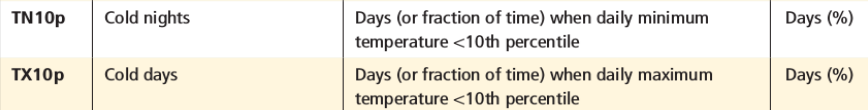

In [190]:
#Vamos a representar la temperatura equivalente al percentil 10 en la región de estudio.
cuantil1= np.quantile(min_data_red_1.tn,0.1,axis=0)
cuantil2= np.quantile(min_data_red_2.tn,0.1,axis=0)

In [191]:
cuantil1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [192]:
#plt.contourf(lon,lat,cuantil1)
minimo= np.min((np.min((np.ma.masked_array(cuantil1, np.isnan(cuantil1)))),np.min((np.ma.masked_array(cuantil2, np.isnan(cuantil2))))))
maximo= np.max((np.max((np.ma.masked_array(cuantil1, np.isnan(cuantil1)))),np.max((np.ma.masked_array(cuantil2, np.isnan(cuantil2))))))

In [193]:
np.round(2.6)

3.0

C:\Anaconda\envs\analisisdatosucm\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Anaconda\envs\analisisdatosucm\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


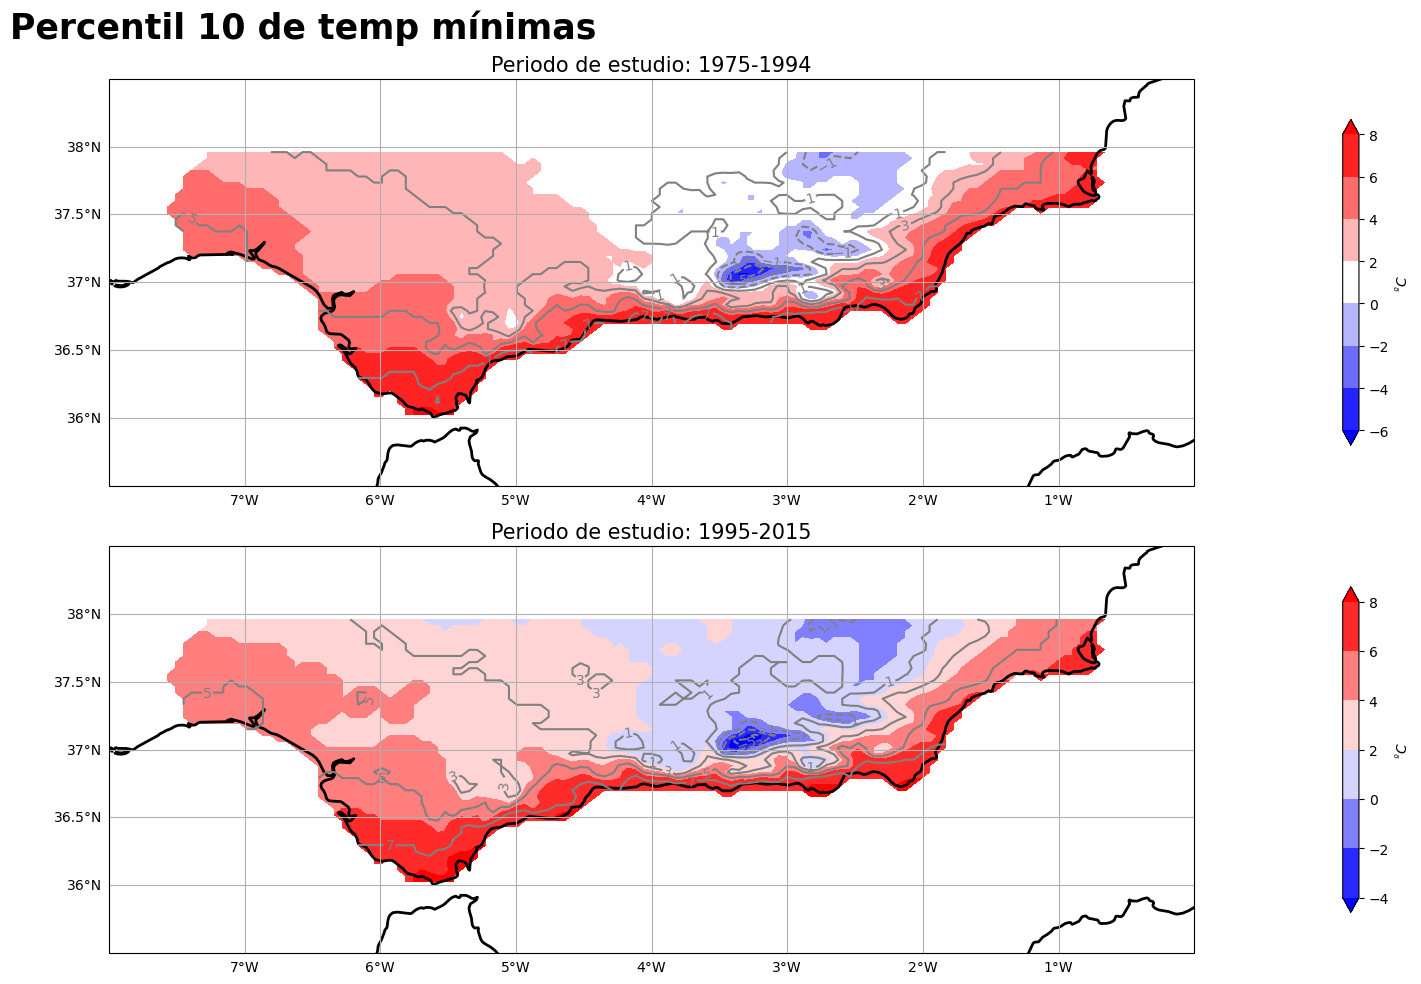

In [194]:
def DibujoMapados(lon,lat,var1,var2,mapbar,unidades,subtitulo1,subtitulo2,figura):
    fig = plt.figure(figsize=(30,10), tight_layout=True) 
    ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
    ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
    fig.suptitle('Percentil 10 de temp mínimas',fontsize=25, weight='bold')
    
    minimo= np.min((np.min((np.ma.masked_array(var1, np.isnan(var1)))),np.min((np.ma.masked_array(var2, np.isnan(var2))))))
    maximo= 1.01* np.max((np.max((np.ma.masked_array(var1, np.isnan(var1)))),np.max((np.ma.masked_array(var2, np.isnan(var2))))))
    levels=np.arange(np.round(minimo),np.round(maximo),2)
     
    im=ax1.contourf(lon,lat,var1, cmap = mapbar, extend='both')
    ax1.coastlines(linewidth = 2)
    gl=ax1.gridlines(draw_labels = True)
    gl.ylabels_right = False
    gl.xlabels_top = False
    fig.colorbar(im,ax=ax1,shrink=0.8, label = unidades,orientation='vertical')
    im2=ax1.contour(lon,lat,var1,levels, colors='gray')
    ax1.clabel(im2, im2.levels, inline=True, fontsize=10)
    ax1.set_extent([-8,0,35.5,38.5])
    ax1.set_title(subtitulo1,fontsize=15)
    
    im3=ax2.contourf(lon,lat,var2, cmap = mapbar, extend='both')
    ax2.coastlines(linewidth = 2)
    gl=ax2.gridlines(draw_labels = True)
    gl.ylabels_right = False
    gl.xlabels_top = False
    fig.colorbar(im3,ax=ax2,shrink=0.8, label = unidades,orientation='vertical')
    im4=ax2.contour(lon,lat,var2,levels, colors='gray')
    ax2.clabel(im4, im4.levels, inline=True, fontsize=10)
    ax2.set_extent([-8,0,35.5,38.5])
    ax2.set_title(subtitulo2,fontsize=15)
    fig.savefig(figura)


lat= min_data_red_1.lat
lon= min_data_red_1.lon



mapbar='bwr'
subtitulo1='Periodo de estudio: 1975-1994'
subtitulo2='Periodo de estudio: 1995-2015'
unidades='$^{º}C$'
figura='Percentil 10 de temp mínimas.png'
DibujoMapados(lon,lat,cuantil1,cuantil2,mapbar,unidades,subtitulo1,subtitulo2,figura)


In [195]:
#Definimos el periodo para determinar los cuantiles como el 1975-1994
#Buscamos el porcentaje de días que la temp es inferior a dicho cuantil
cuantil= cuantil1
num_cold1= np.sum(np.where(min_data_red_1.tn<cuantil,1,0),axis=0)
num_cold2= np.sum(np.where(min_data_red_2.tn<cuantil,1,0),axis=0)
n= min_data_red_1.tn.shape[0]
por1= num_cold1*100/n
por2= num_cold2*100/n
mini= np.min((np.min(por1),np.min(por2)))
maxi= np.max((np.max(por1),np.max(por2)))

Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el primer periodo')

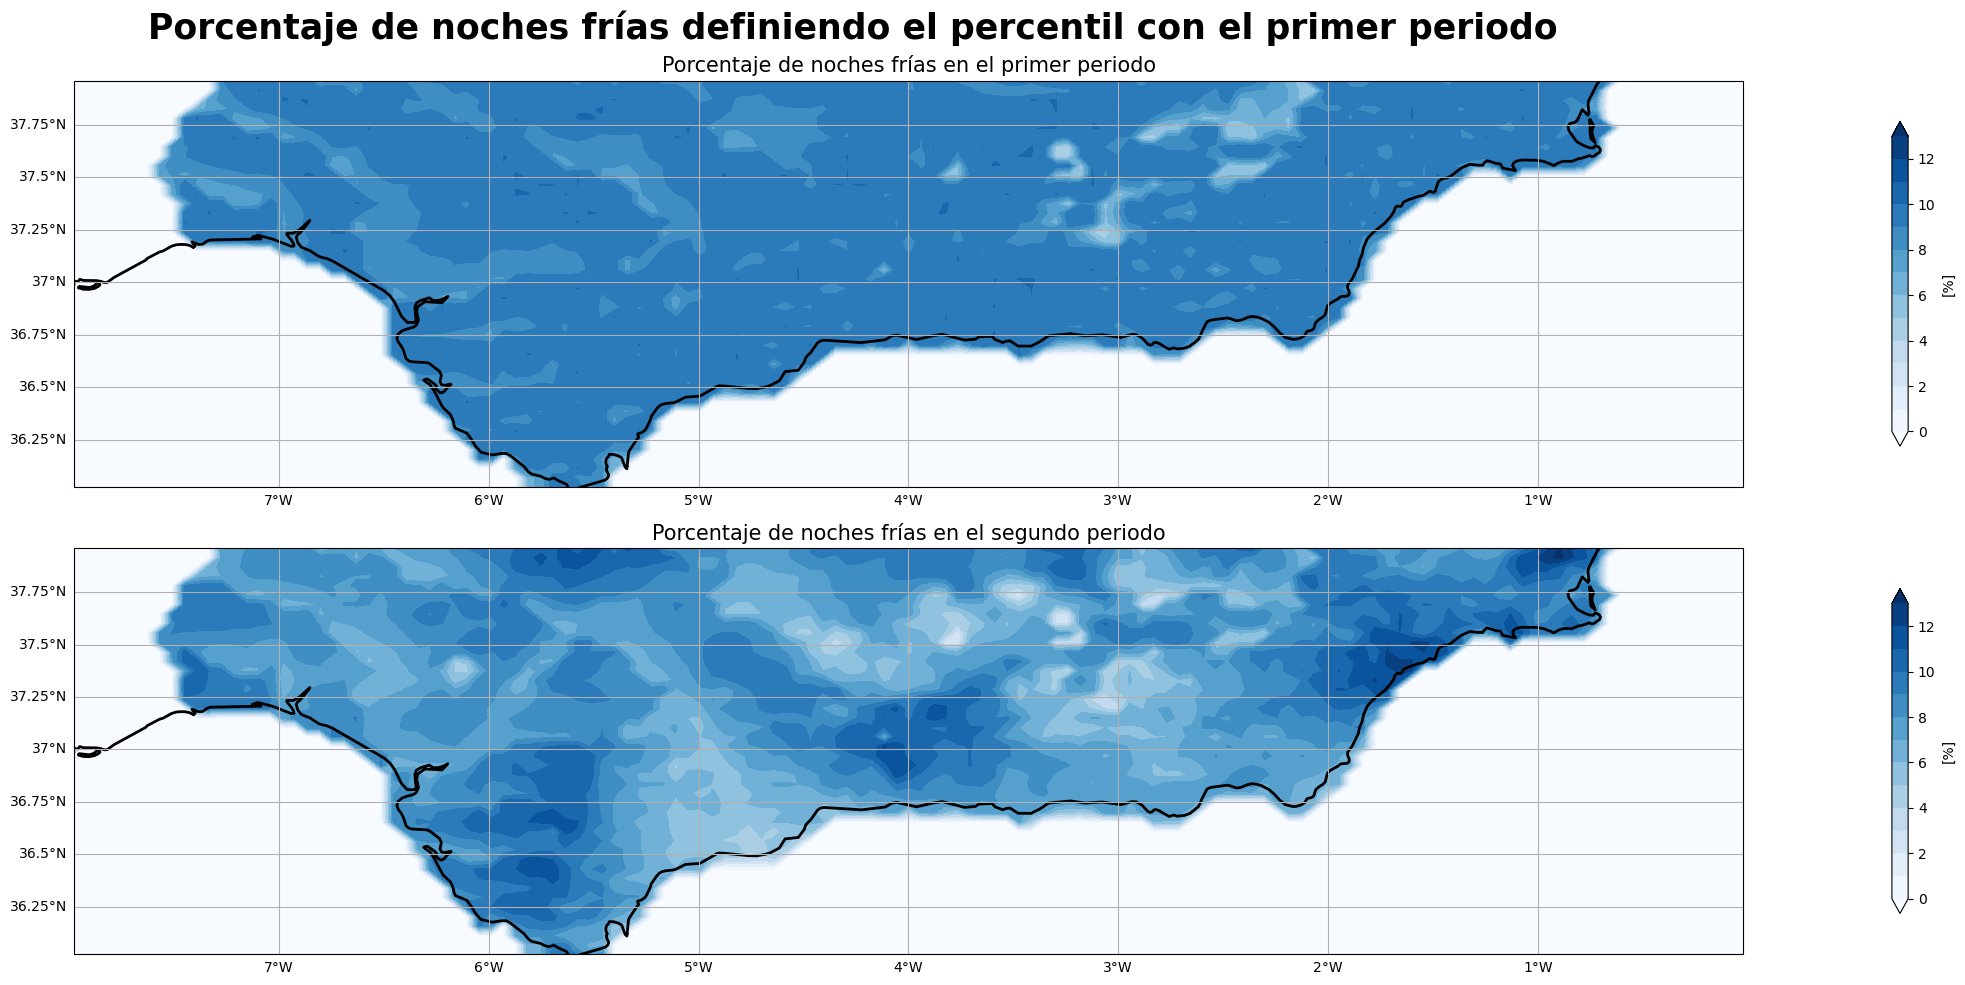

In [196]:
#Representamos el porcentaje para cada punto de la malla de datos
fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax2.coastlines(linewidth = 2)
gl=ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False

 
cmap= 'Blues'
unidades= '[%]'
#im=ax1.contourf(lon,lat,por1, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
im=ax1.contourf(lon,lat,por1,cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)

im2=ax2.contourf(lon,lat,por2, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el primer periodo',fontsize=25, weight='bold')


Text(0.5, 0.98, 'Porcentaje de noches frías definiendo el percentil con el segundo periodo')

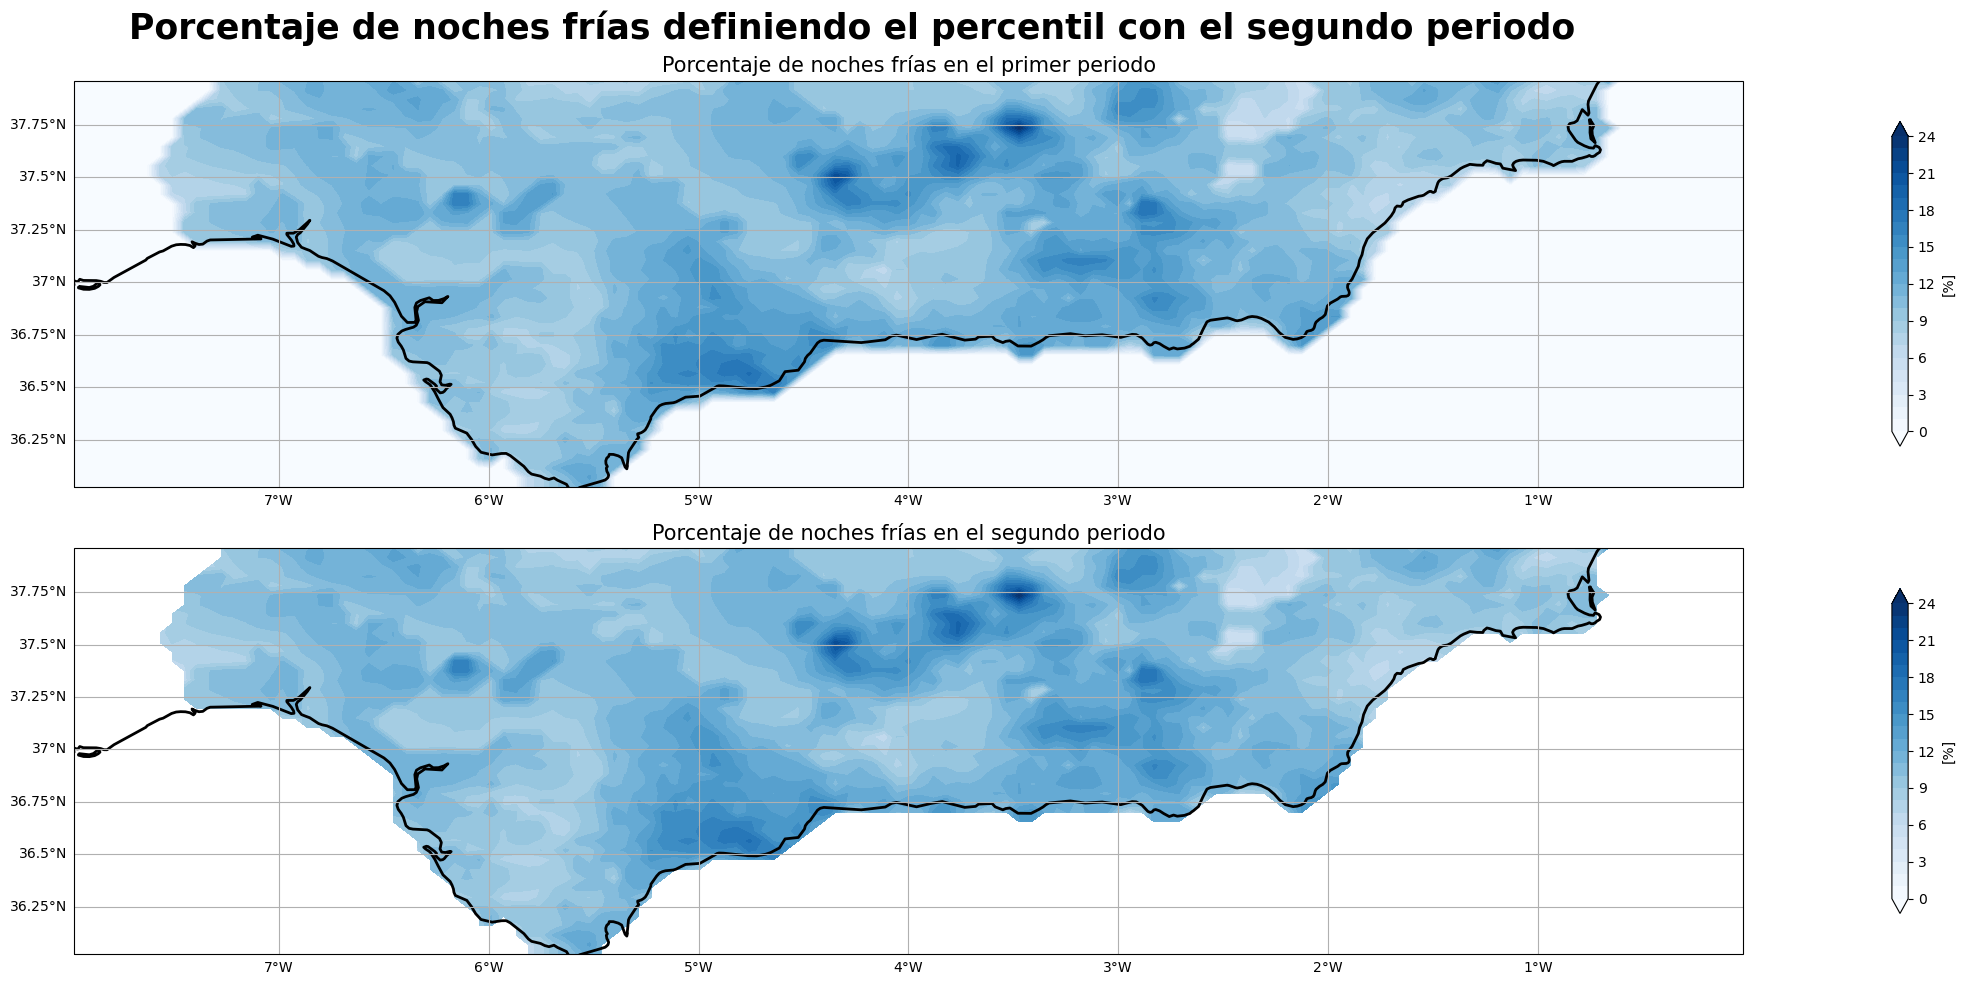

In [275]:
cuantil= cuantil2
num_cold1= np.sum(np.where(min_data_red_1.tn<cuantil,1,0),axis=0)
num_cold2= np.sum(np.where(min_data_red_2.tn<cuantil,1,0),axis=0)
n= min_data_red_1.tn.shape[0]
por1= num_cold1*100/n
por2= num_cold2*100/n
mini= np.min((np.min(por1),np.min(por2)))
maxi= np.max((np.max(por1),np.max(por2)))

fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(211, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(212, projection=ccrs.PlateCarree())
cbarticks = np.arange(mini,maxi,1)

ax1.coastlines(linewidth = 2)
gl=ax1.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False
ax2.coastlines(linewidth = 2)
gl=ax2.gridlines(draw_labels = True)
gl.ylabels_right = False
gl.xlabels_top = False

 
cmap= 'Blues'
unidades= '[%]'
#im=ax1.contourf(lon,lat,por1, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
im=ax1.contourf(lon,lat,por1,cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)

#im2=ax2.contourf(lon,lat,por2, cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
im2=ax2.contourf(lon,lat,(np.where(np.isnan(min_data_red_1.tn),np.nan,por1).mean(axis=0)), cbarticks,cmap = cmap, extend='both', vmin = mini, vmax = maxi)
fig.colorbar(im,ax=ax1,shrink=0.8, label=unidades,orientation='vertical')
fig.colorbar(im2,ax=ax2,shrink=0.8, label=unidades,orientation='vertical')
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías definiendo el percentil con el segundo periodo',fontsize=25, weight='bold')

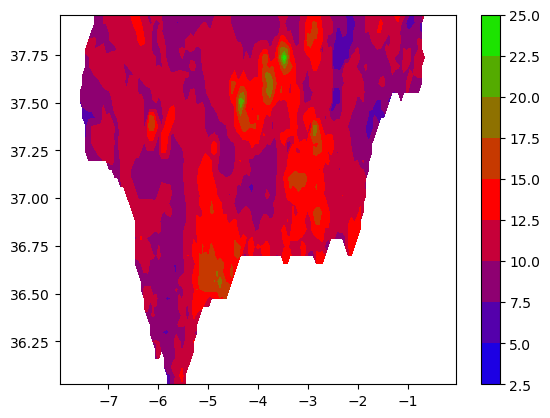

In [214]:
x,y = np.meshgrid(min_data_red_1.lon, min_data_red_1.lat)
day= (np.where(np.isnan(min_data_red_1.tn),np.nan,por1).mean(axis=0))
#im= plt.contourf(x,y,min_data_red_1.tn[0,:,:],cmap='brg')
im= plt.contourf(x,y,day,cmap='brg')
plt.colorbar(im)

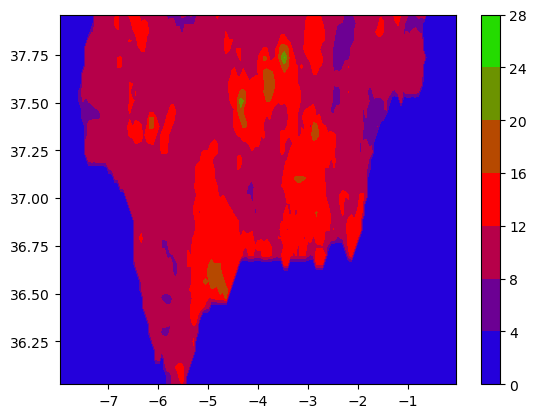

In [215]:
im= plt.contourf(lon,lat,por1,cmap='brg')
plt.colorbar(im)

In [213]:
day= np.mean(np.where(np.isnan(min_data_red_1.tn),np.nan,por1)
day.shape

(7305, 44, 137)

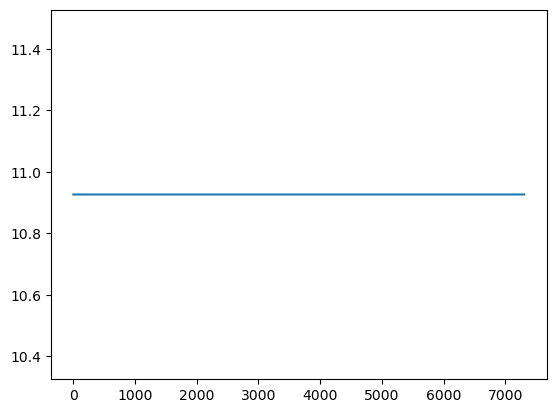

In [209]:
data= np.nanmean(np.where(np.isnan(min_data_red_1.tn),np.nan,por1),axis=(1,2))
#plt.plot(np.nanmean(np.where(np.isnan(min_data_red_1.tn),np.nan,por1),axis=(1,2)))
plt.plot(data)

In [268]:
cuantil.shape

(44, 137)

In [269]:
np.nanmean(np.where(np.isnan(cuantil),np.nan,por1),axis=(1,2))

AxisError: axis 2 is out of bounds for array of dimension 2

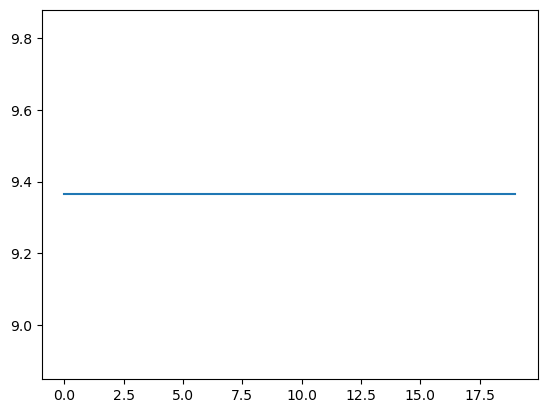

In [264]:
def correct_series(percent,tmin):
    #tminR = tmin.sel(lat=slice(float(np.nanmax(percent.lat)),float(np.min(percent.lat))),lon=slice(float(np.min(percent.lon)),float(np.max(percent.lon))),Time=slice('1901','2014'))
    tminR_year = tmin.sel(Time=((tmin.Time.dt.month == 6) & (tmin.Time.dt.day == 1)))
    #tminR_year = tminR.groupby('Time.year').max('Time')
    corr_R = np.where(np.isnan(tminR_year),np.nan,percent)
    return np.nanmean(corr_R,axis=(1,2))

lat_lims= [38,36]
lon_lims= [-8,0]

#max_data_red= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
#min_data_red= min_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
serie_bien= correct_series(por2,tmin=min_data_red_1.tn)
plt.plot(serie_bien)

In [245]:
serie_bien.shape

(20, 44, 137)

(20, 44, 137)
(20,)


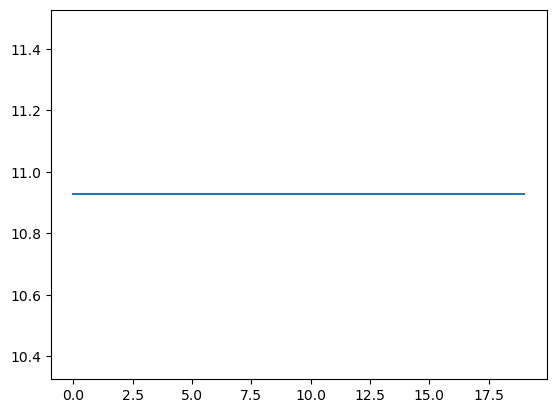

In [260]:
a=np.nanmean(serie_bien,axis=(1,2))
print(serie_bien.shape)
print(a.shape)
plt.plot(a)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

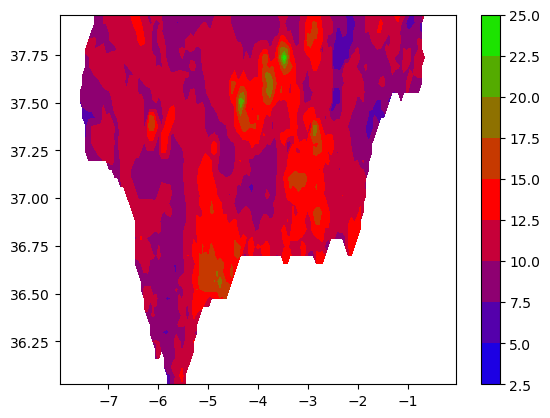

In [233]:

im= plt.contourf(x,y,serie_bien,cmap='brg')
plt.colorbar(im)

### Invierno

In [217]:
#max_data_red= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1975','2015'))
invierno1= min_data_red_1.tn[min_data_red_1['Time.season']=='DJF',:,:].squeeze()
invierno2= min_data_red_2.tn[min_data_red_2['Time.season']=='DJF',:,:].squeeze()
#Calculamos el cuantil con todo el periodo
alldata_inv= min_data_red.tn[min_data_red['Time.season']=='DJF',:,:].squeeze()
cuantil_inv= np.quantile(alldata_inv,0.1,axis=0)
cuantil_inv.shape

(44, 137)

In [286]:
invierno1['Time.year']
n_cold_days_inv_1= np.zeros(20)
n_cold_days_inv_2= np.zeros(21)
#num_cold1_inv= np.sum(np.where(min_data_red_1.tn<cuantil,1,0),axis=0)
#n= min_data_red_1.tn.shape[0]
#por1= num_cold1*100/n

s=0
for i in range(1975,1995):
    a= np.sum(np.where(invierno1[invierno1['Time.year']==i]<cuantil_inv,1,0),axis=0)
    n_cold_days_inv_1[s]= np.nanmean(np.where(np.isnan(invierno1[invierno1['Time.year']==i]),np.nan,a)) #esto lo tenemos que hacer porque si no al hacer la media toma los nan como 0
    s+=1
l=0    
for i in range(1995,2016):
    a= np.sum(np.where(invierno2[invierno2['Time.year']==i]<cuantil_inv,1,0),axis=0)
    n_cold_days_inv_2[l]= np.nanmean(np.where(np.isnan(invierno2[invierno2['Time.year']==i]),np.nan,a))
    l+=1 
    
n_days_inv= invierno1[invierno1['Time.year']==1975,:,:].shape[0]
perc_cold_days_1= (n_cold_days_inv_1/n_days_inv)*100
perc_cold_days_2= (n_cold_days_inv_2/n_days_inv)*100

Text(0.5, 0.98, 'Porcentaje de noches frías en invierno definiendo el percentil el periodo completo')

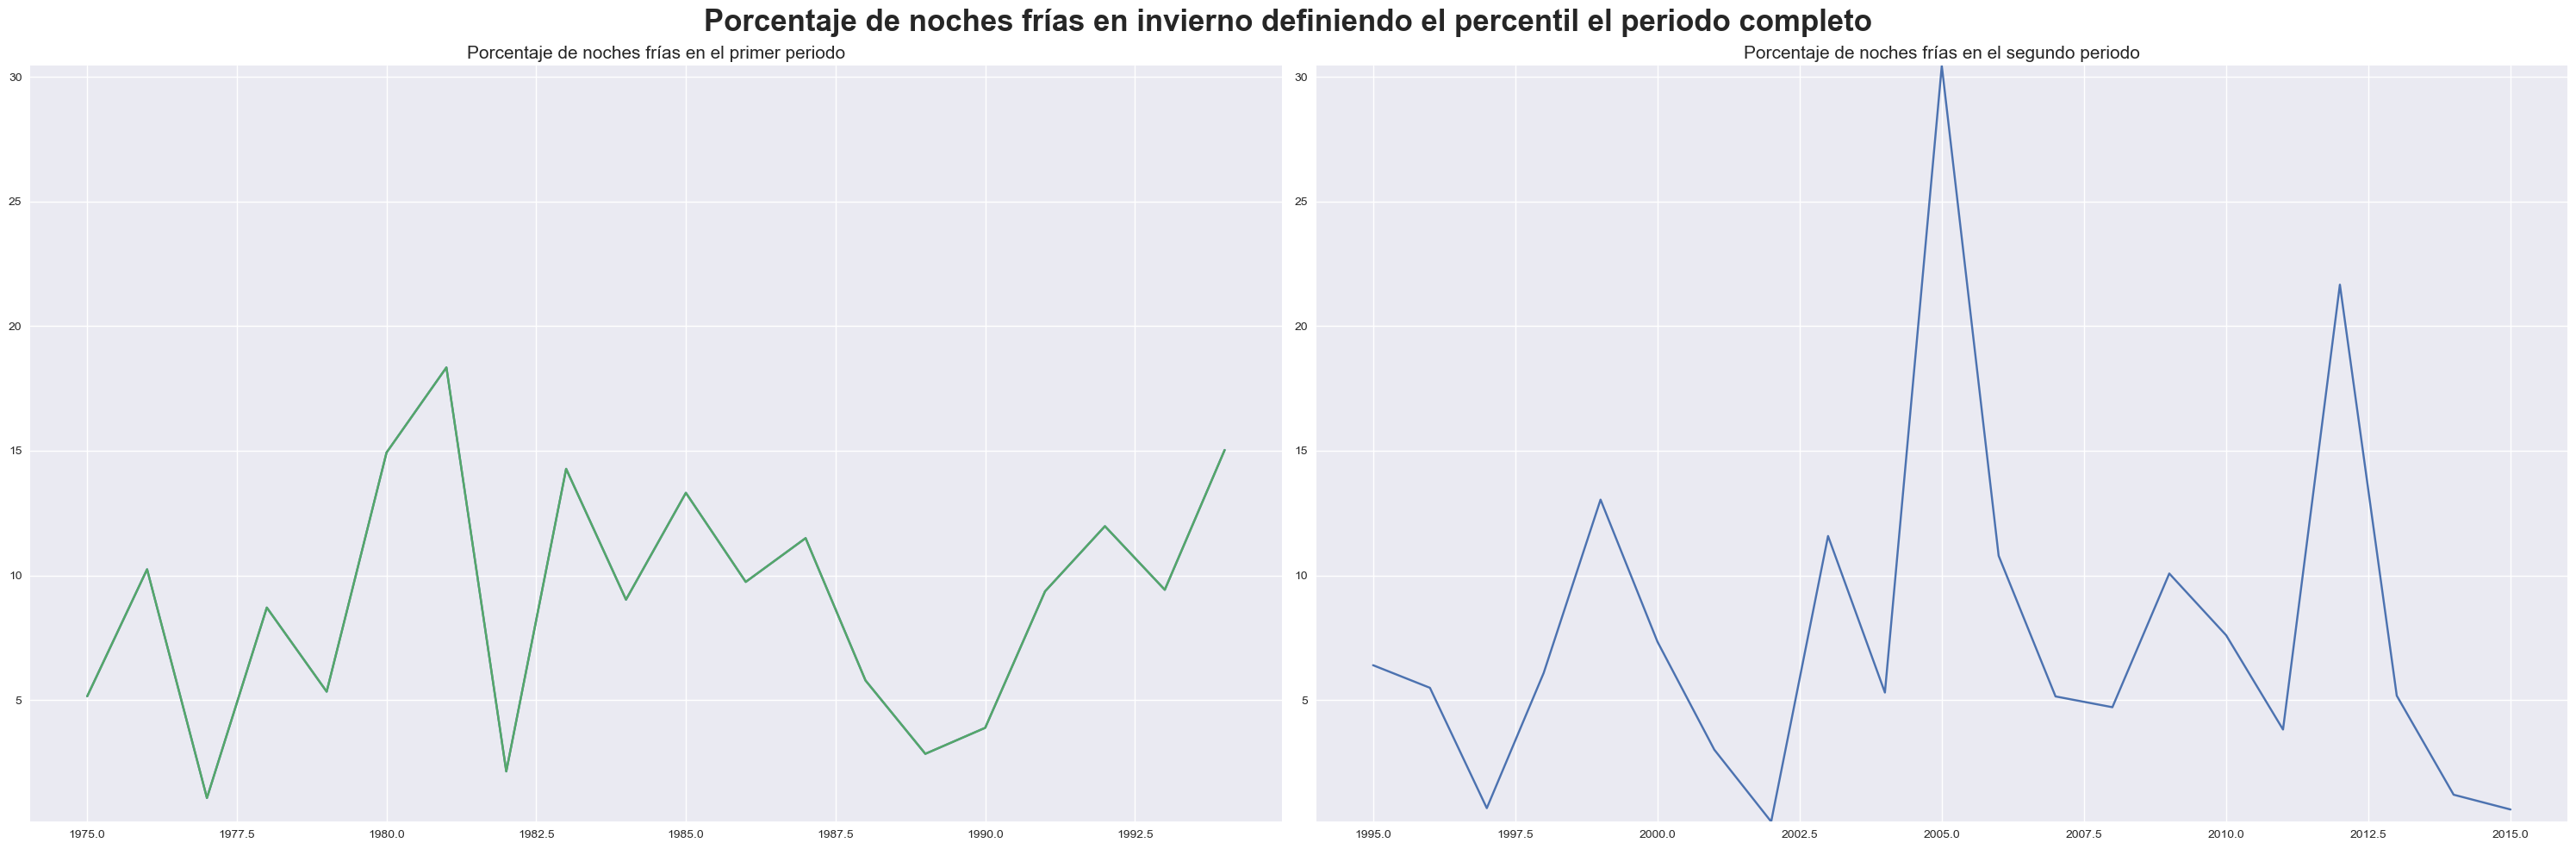

In [287]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

period1= np.arange(1975,1995,1)
period2= np.arange(1995,2016,1)
ax1.plot(period1,perc_cold_days_1)
ax1.plot(period1,perc_cold_days_11)

ax2.plot(period2,perc_cold_days_2)
maximo= np.max((np.max(perc_cold_days_1),np.max(perc_cold_days_2)))
minimo= np.min((np.min(perc_cold_days_1),np.min(perc_cold_days_2)))
ax1.set_ylim(minimo,maximo)
ax2.set_ylim(minimo,maximo)
ax1.set_title('Porcentaje de noches frías en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías en invierno definiendo el percentil el periodo completo',fontsize=25, weight='bold')

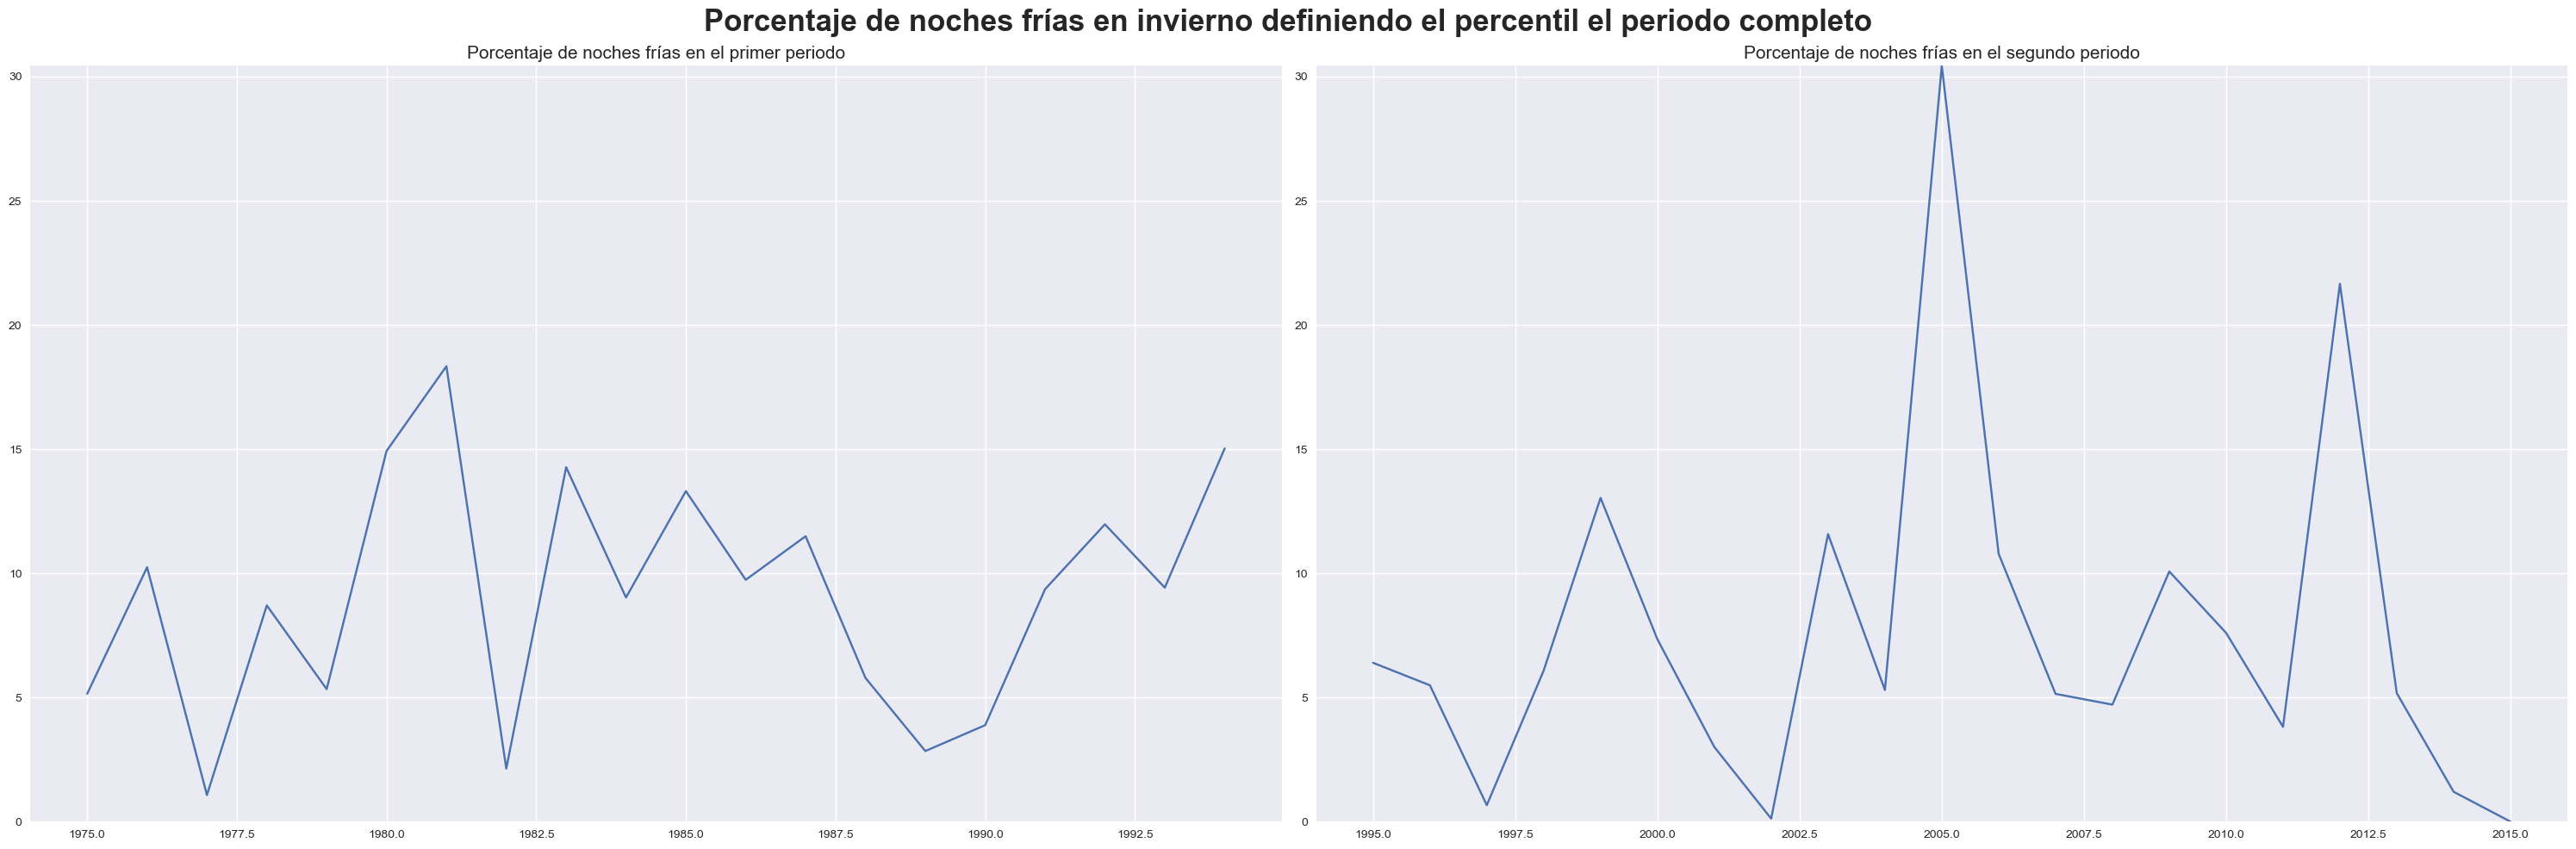

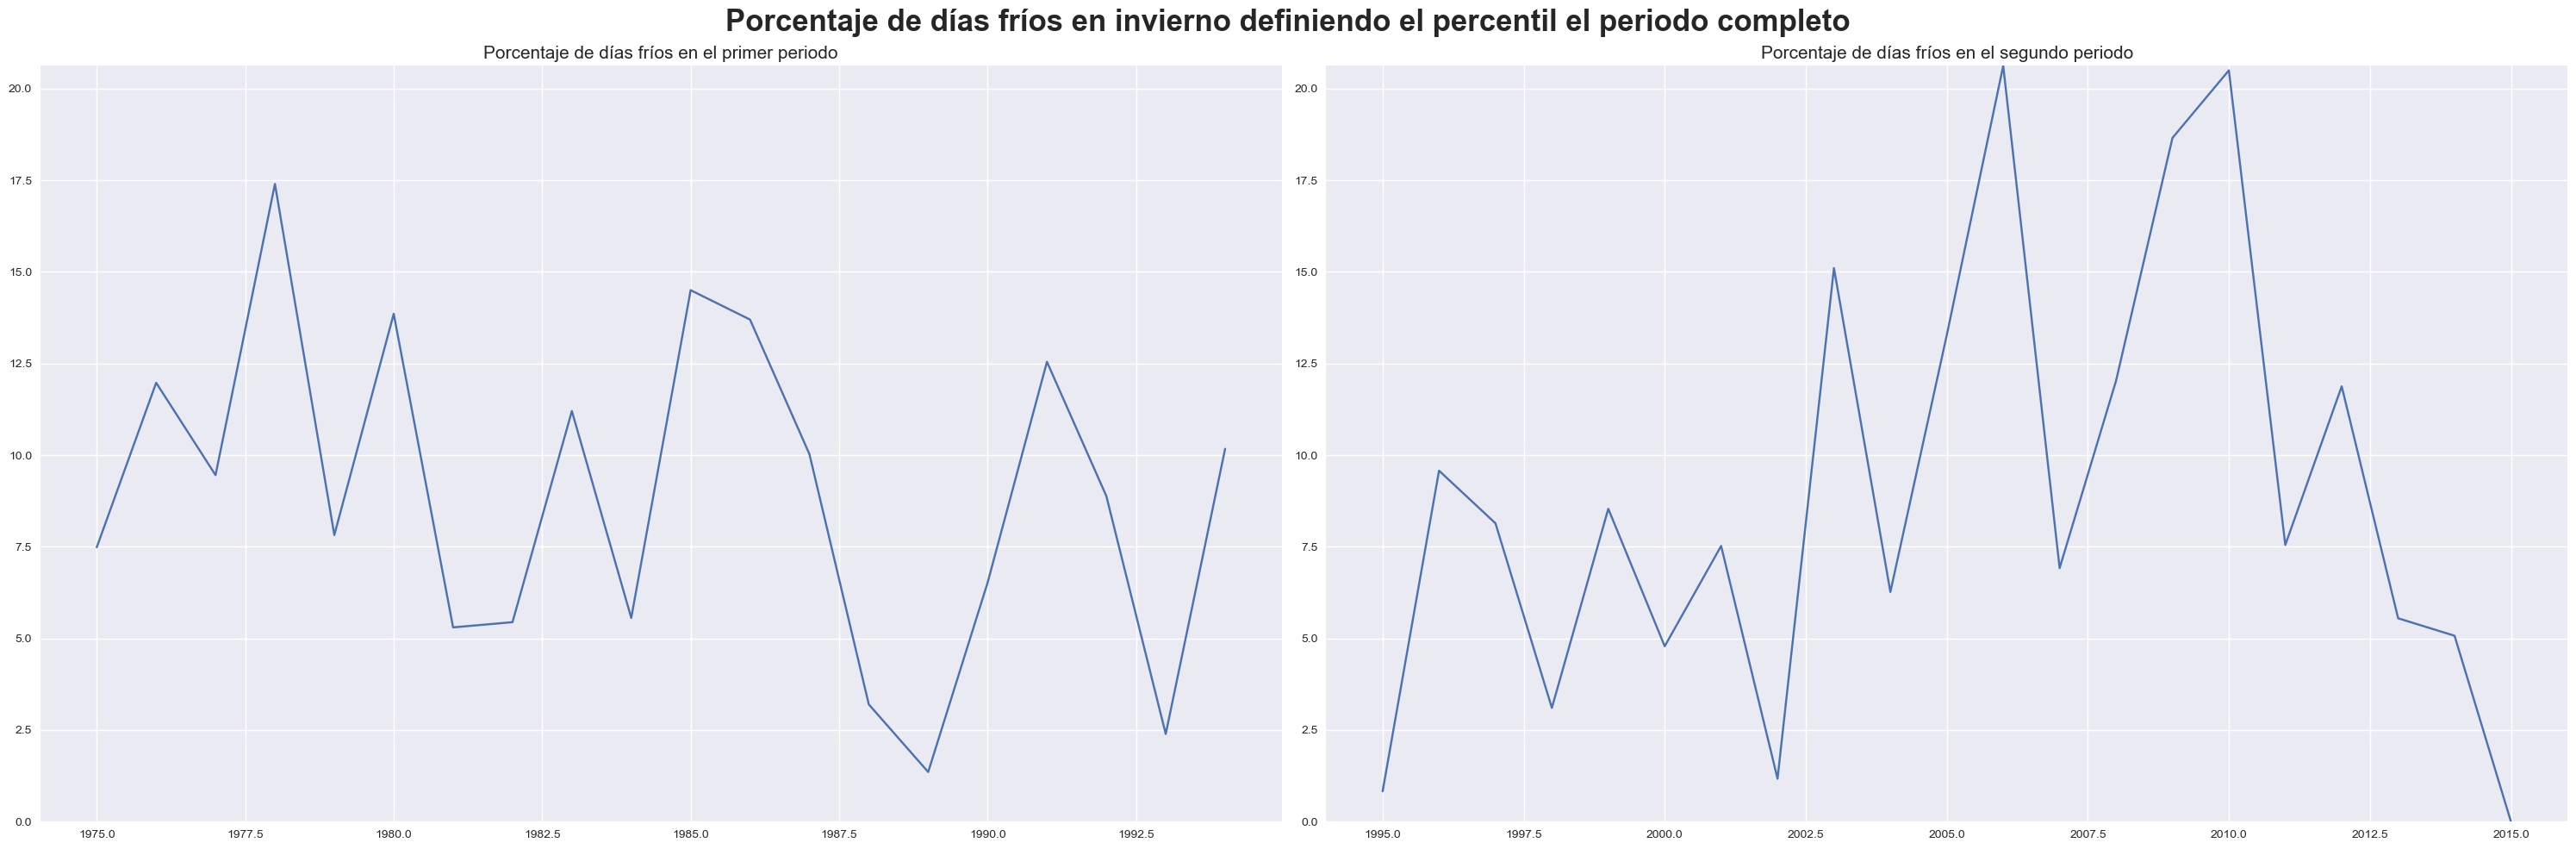

In [288]:
def cold_days_percentage(allperiod,period1, period2, season,subtitle1,subtitle2,title,cold_nights=True):
    if cold_nights==True:
        invierno1= period1.tn[period1['Time.season']==season,:,:].squeeze()
        invierno2= period2.tn[period2['Time.season']==season,:,:].squeeze()
        alldata_inv= allperiod.tn[allperiod['Time.season']==season,:,:].squeeze()
    else:   
        invierno1= period1.tx[period1['Time.season']==season,:,:].squeeze()
        invierno2= period2.tx[period2['Time.season']==season,:,:].squeeze()
        alldata_inv= allperiod.tx[allperiod['Time.season']==season,:,:].squeeze()
        
    cuantil_inv= np.quantile(alldata_inv,0.1,axis=0)
    n_cold_days_inv_1= np.zeros(20)
    n_cold_days_inv_2= np.zeros(21)


    s=0
    for i in range(1975,1995):
        a= np.sum(np.where(invierno1[invierno1['Time.year']==i]<cuantil_inv,1,0),axis=0)
        n_cold_days_inv_1[s]= np.nanmean(np.where(np.isnan(invierno1[invierno1['Time.year']==i]),np.nan,a)) #esto lo tenemos que hacer porque si no al hacer la media toma los nan como 0
        s+=1
    l=0    
    for i in range(1995,2015):
        a= np.sum(np.where(invierno2[invierno2['Time.year']==i]<cuantil_inv,1,0),axis=0)
        n_cold_days_inv_2[l]= np.nanmean(np.where(np.isnan(invierno2[invierno2['Time.year']==i]),np.nan,a))
        l+=1 

    n_days_inv= invierno1[invierno1['Time.year']==1975,:,:].shape[0]
    perc_cold_days_1= (n_cold_days_inv_1/n_days_inv)*100
    perc_cold_days_2= (n_cold_days_inv_2/n_days_inv)*100
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(30,10), tight_layout=True) 
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    period1= np.arange(1975,1995,1)
    period2= np.arange(1995,2016,1)
    ax1.plot(period1,perc_cold_days_1)
    ax2.plot(period2,perc_cold_days_2)
    maximo= np.max((np.max(perc_cold_days_1),np.max(perc_cold_days_2)))
    minimo= np.min((np.min(perc_cold_days_1),np.min(perc_cold_days_2)))
    ax1.set_ylim(minimo,maximo)
    ax2.set_ylim(minimo,maximo)
    ax1.set_title(subtitle1,fontsize=15)
    ax2.set_title(subtitle2,fontsize=15)
    fig.suptitle(title,fontsize=25, weight='bold')

subtitle1= 'Porcentaje de noches frías en el primer periodo'
subtitle2= 'Porcentaje de noches frías en el segundo periodo'
title= 'Porcentaje de noches frías en invierno definiendo el percentil el periodo completo'
subtitle12= 'Porcentaje de días fríos en el primer periodo'
subtitle22= 'Porcentaje de días fríos en el segundo periodo'
title2= 'Porcentaje de días fríos en invierno definiendo el percentil el periodo completo' 

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'DJF',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'DJF',subtitle12,subtitle22,title2,cold_nights=False)

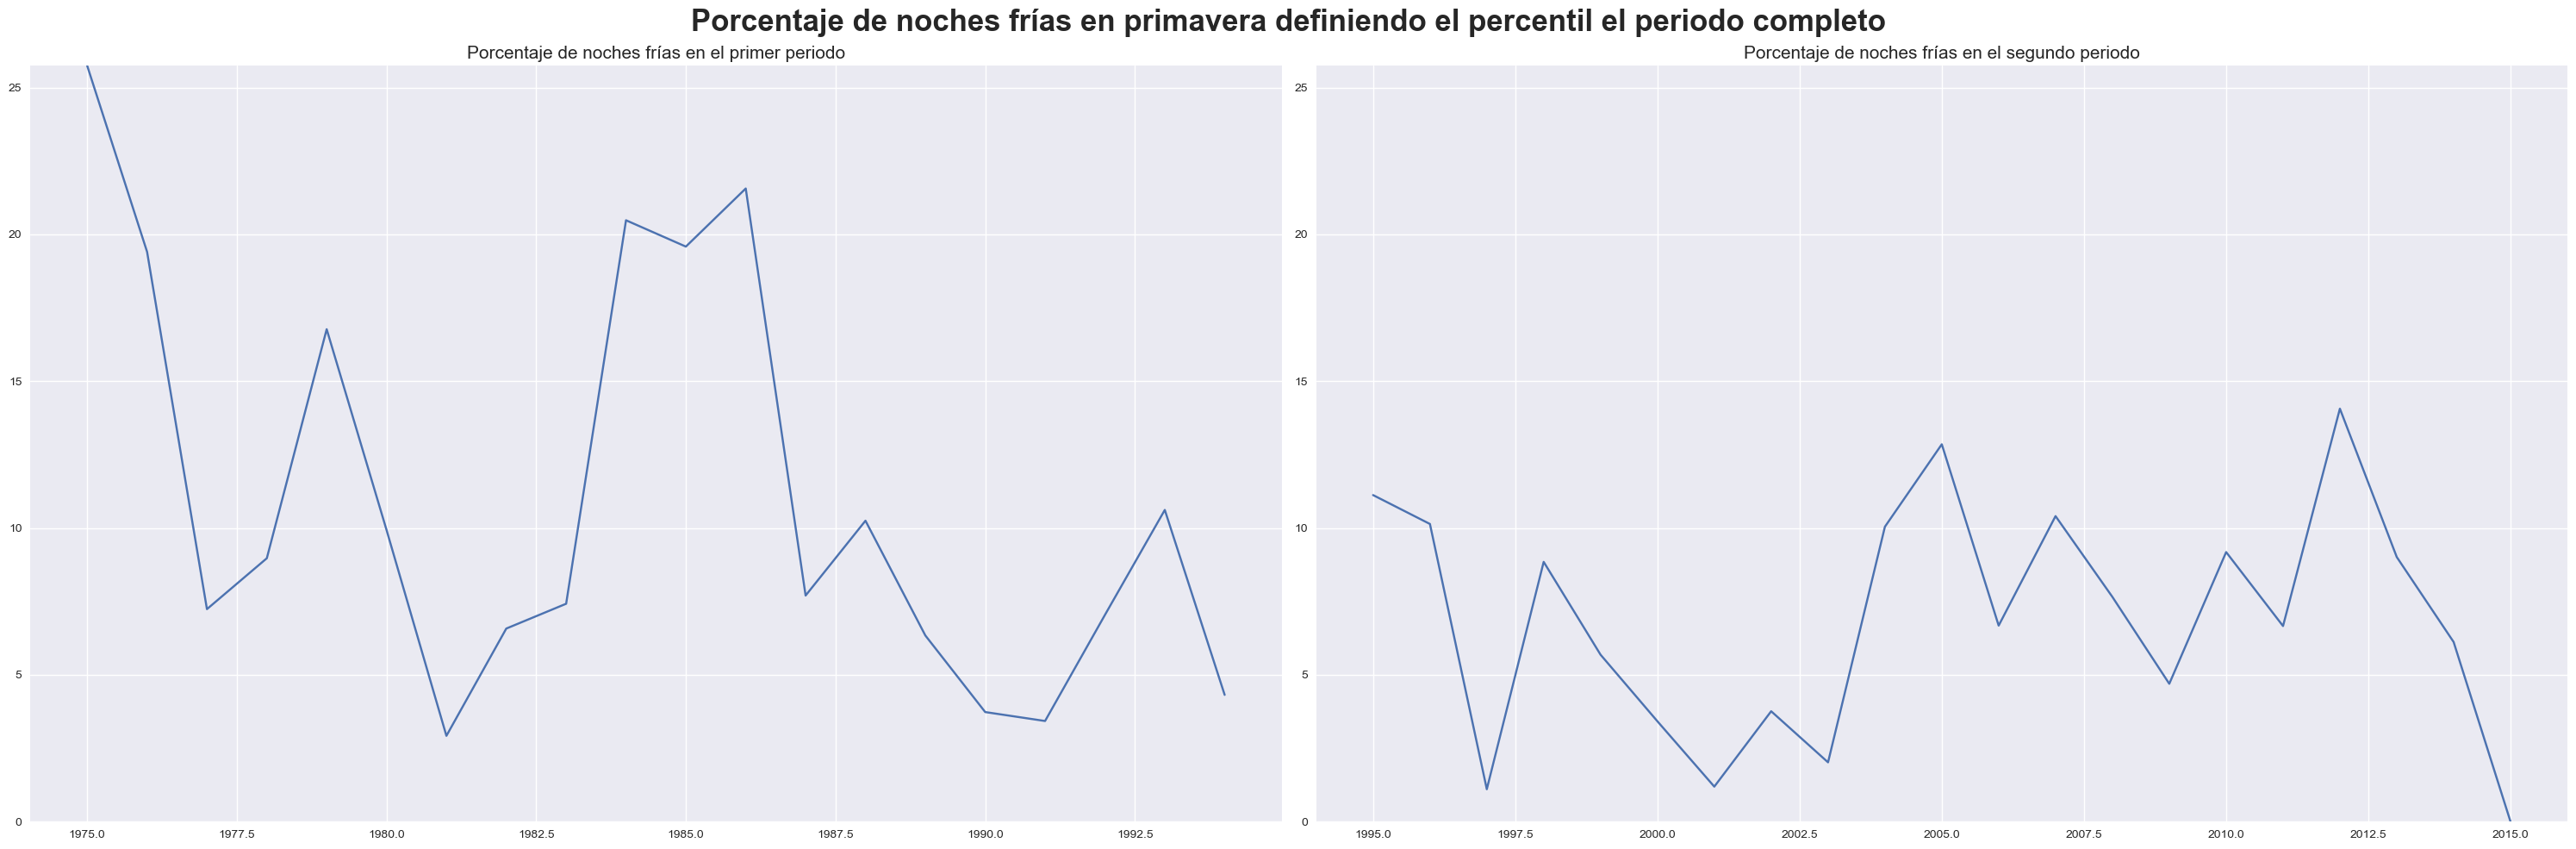

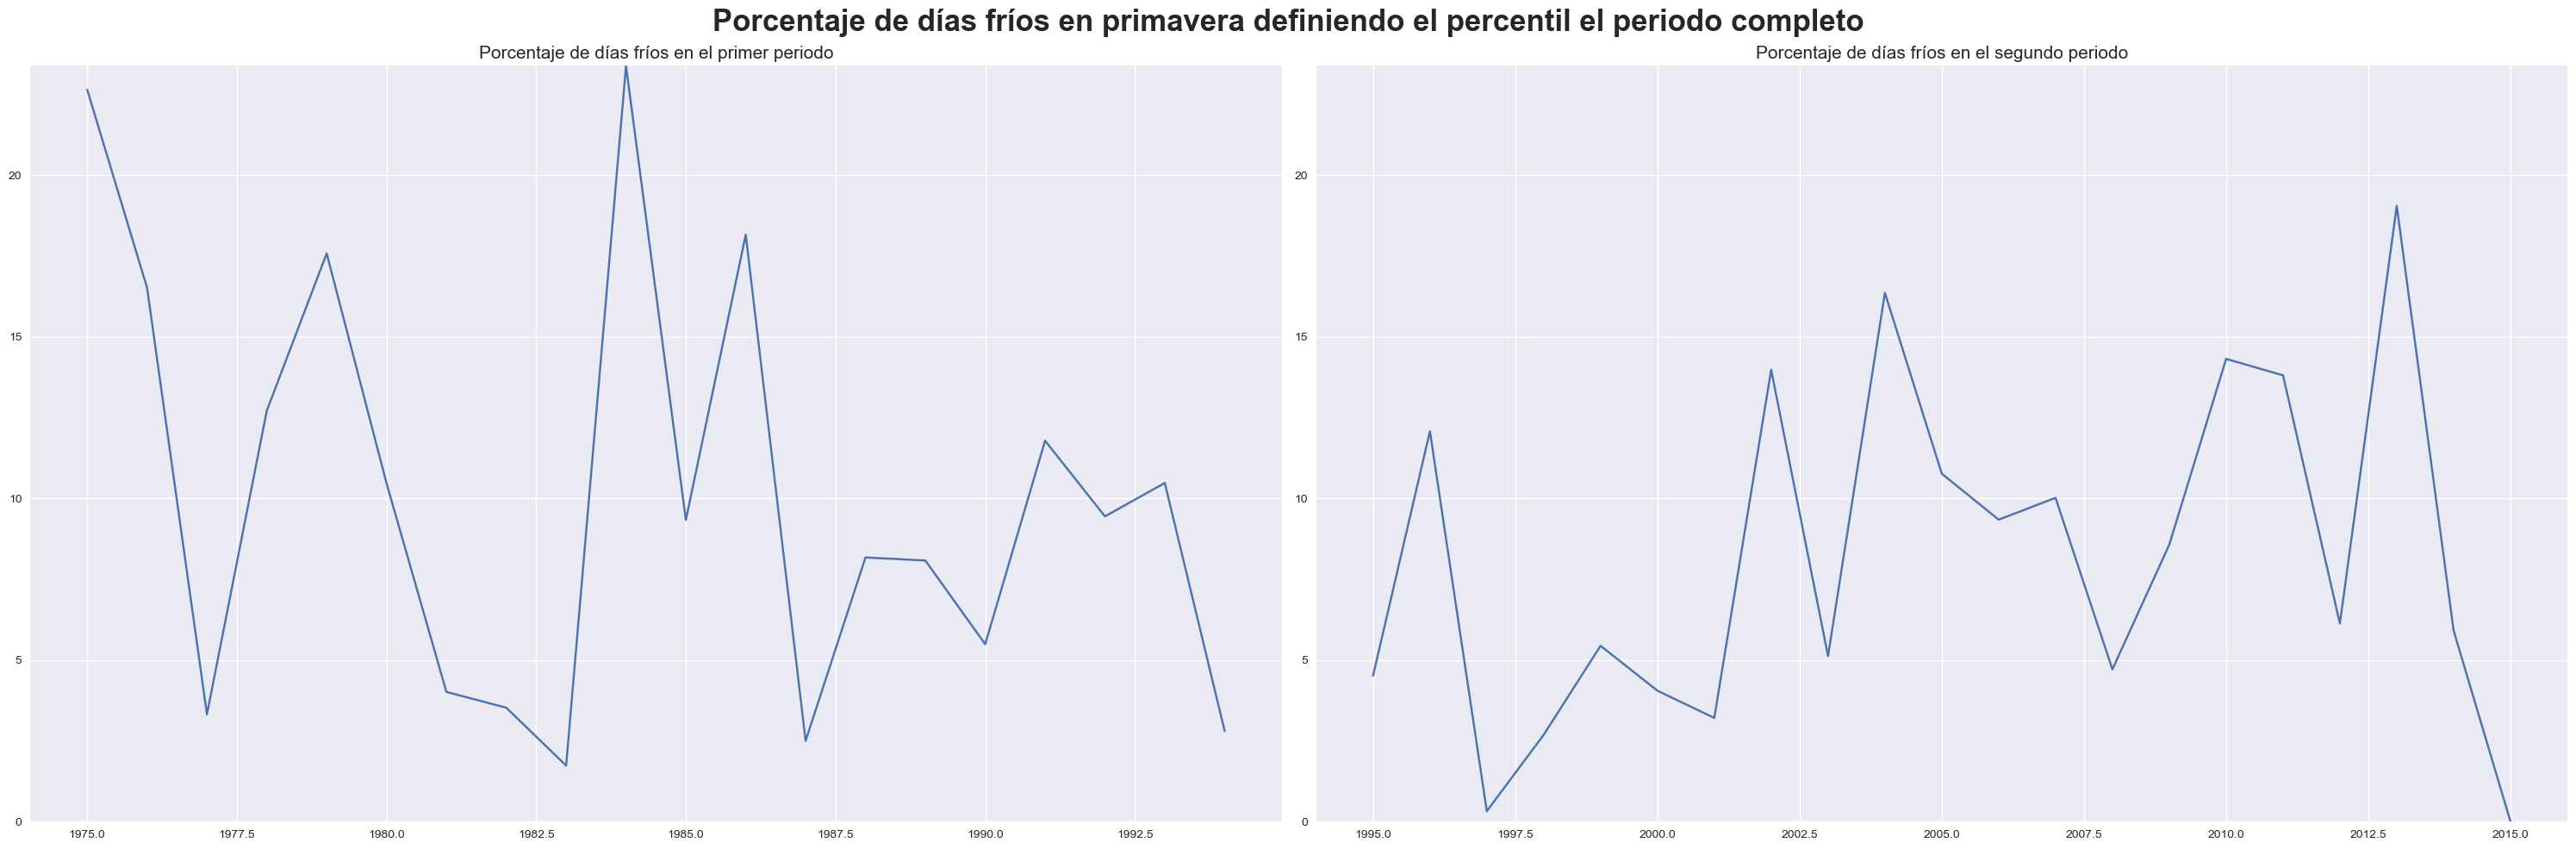

In [289]:
title= 'Porcentaje de noches frías en primavera definiendo el percentil el periodo completo'
title2= 'Porcentaje de días fríos en primavera definiendo el percentil el periodo completo'

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'MAM',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'MAM',subtitle12,subtitle22,title2,cold_nights=False)

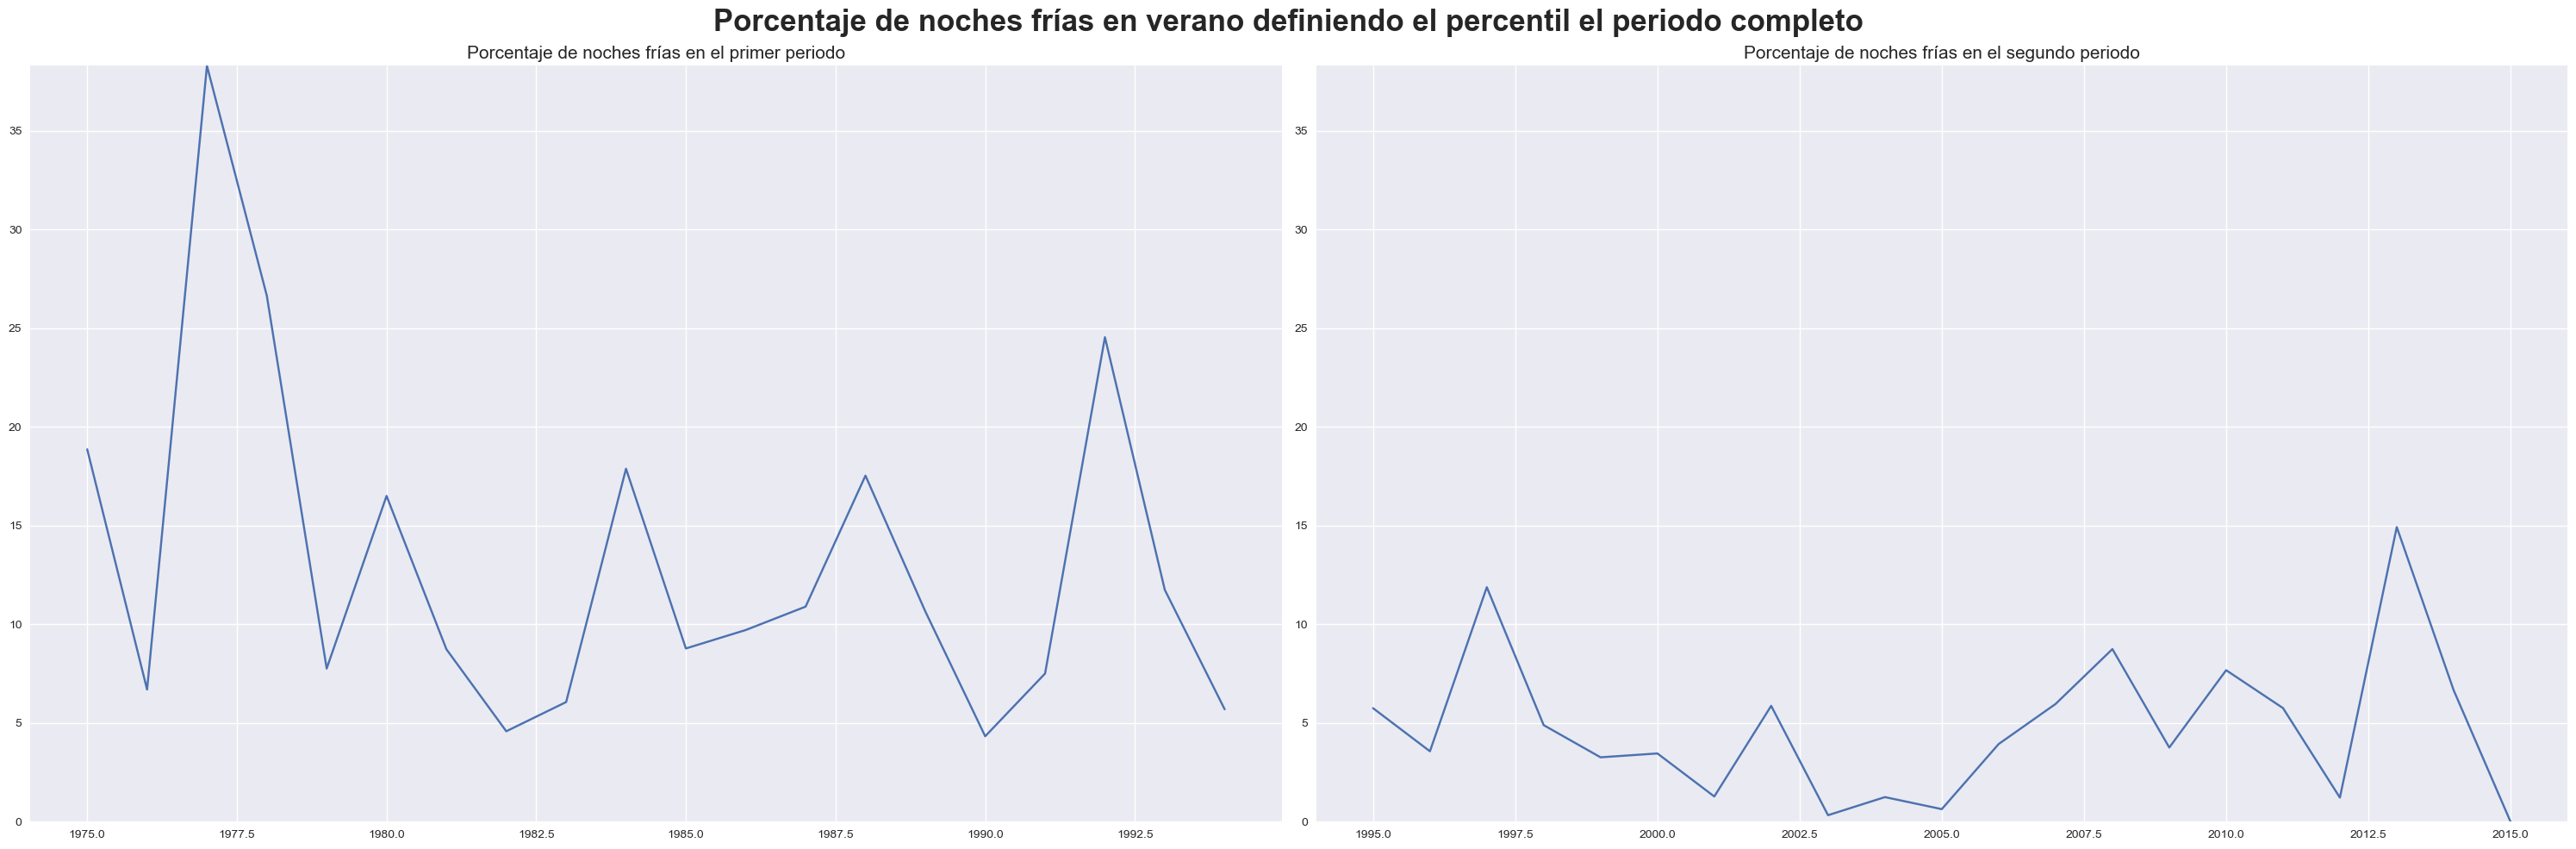

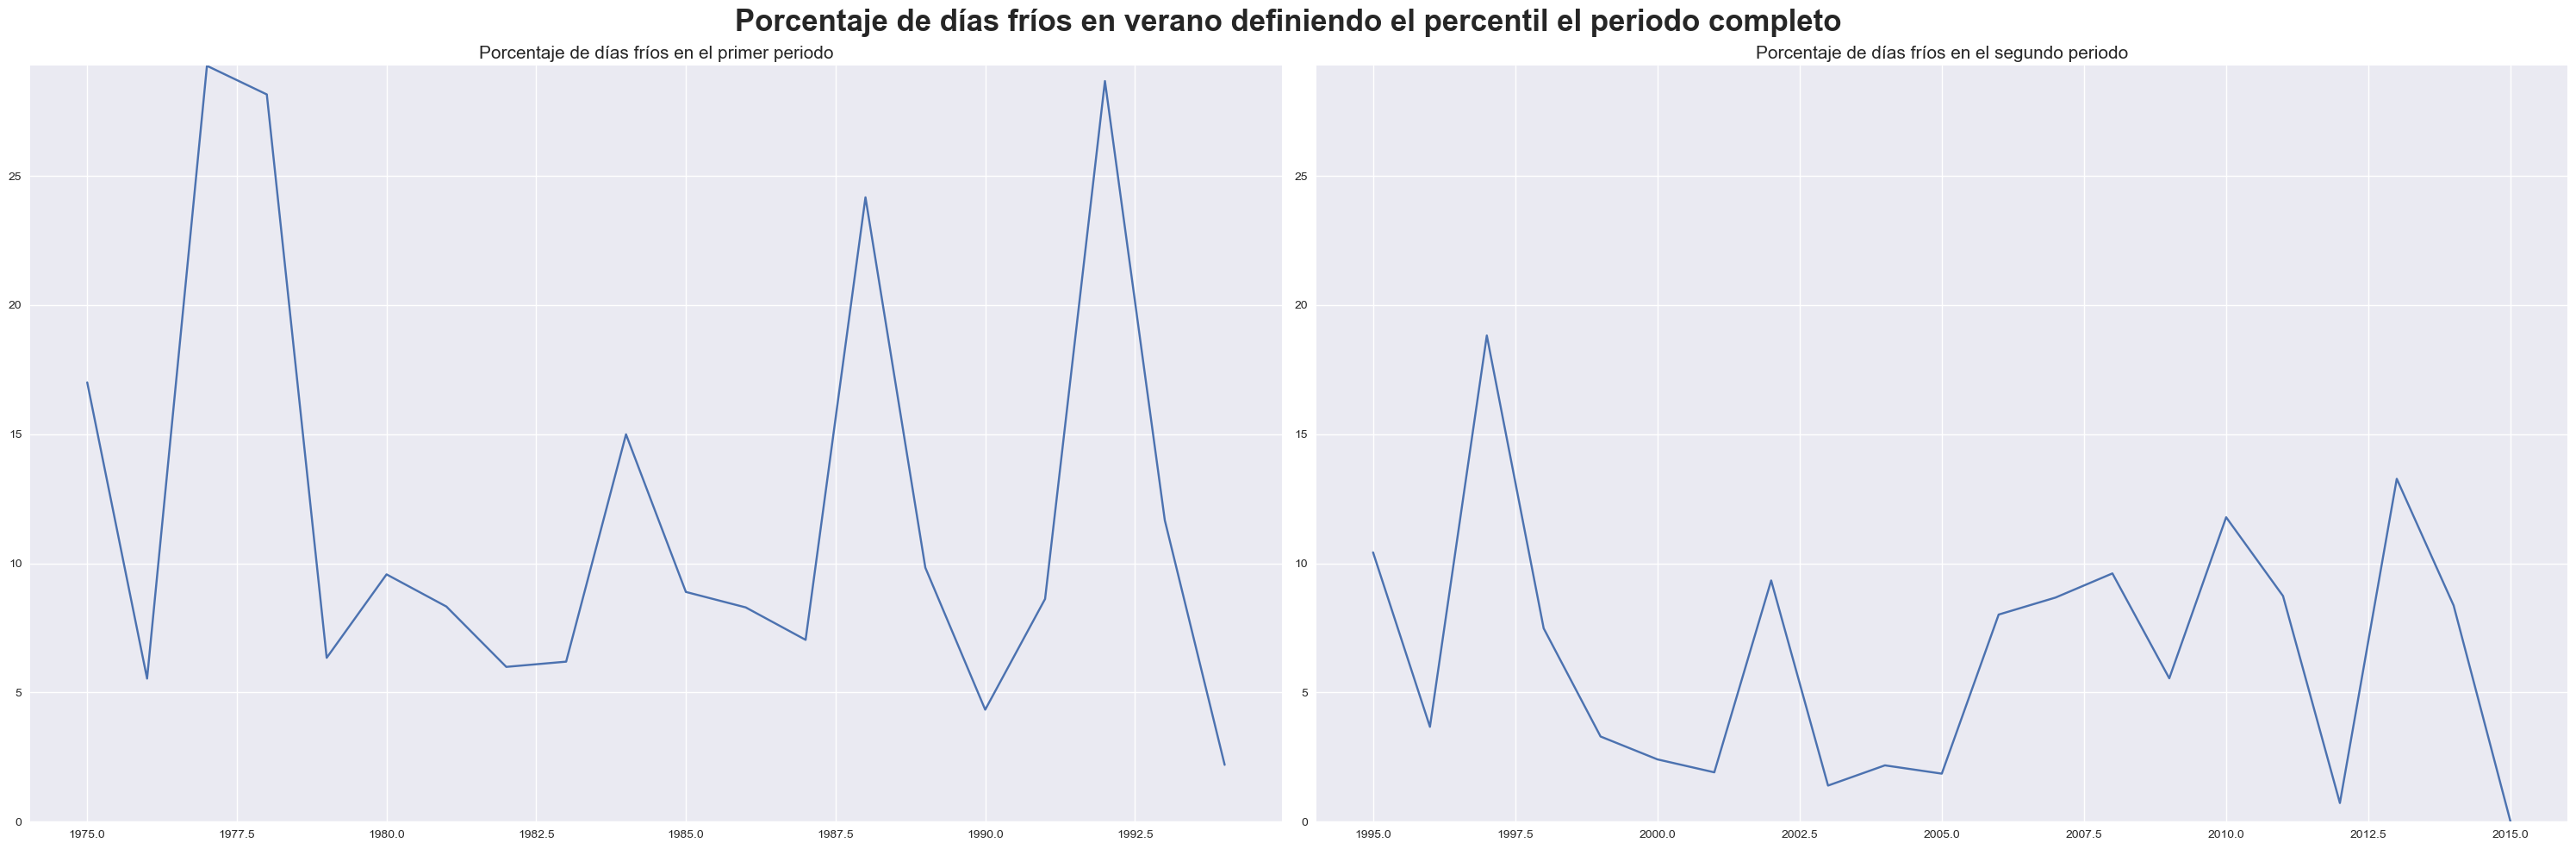

In [290]:
title= 'Porcentaje de noches frías en verano definiendo el percentil el periodo completo'
title2= 'Porcentaje de días fríos en verano definiendo el percentil el periodo completo'

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'JJA',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'JJA',subtitle12,subtitle22,title2,cold_nights=False)


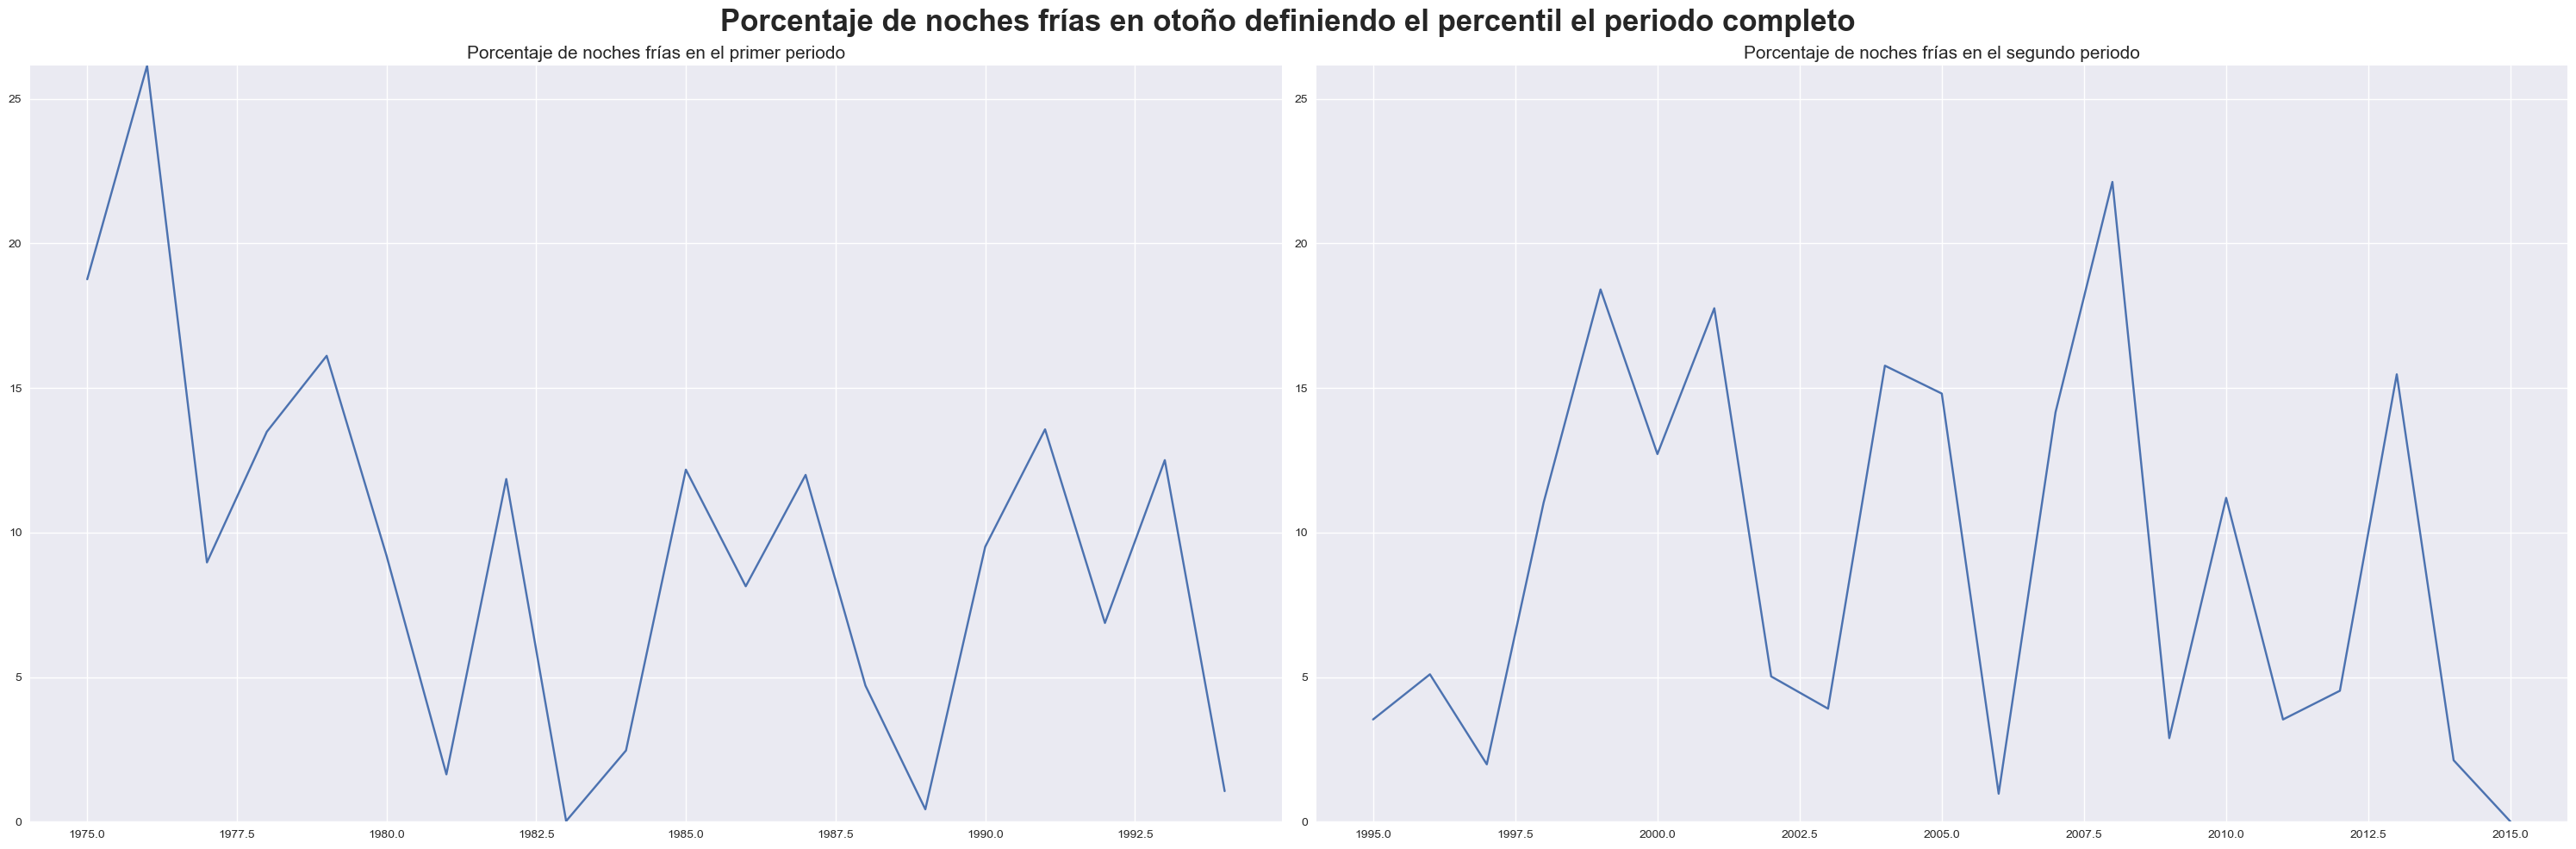

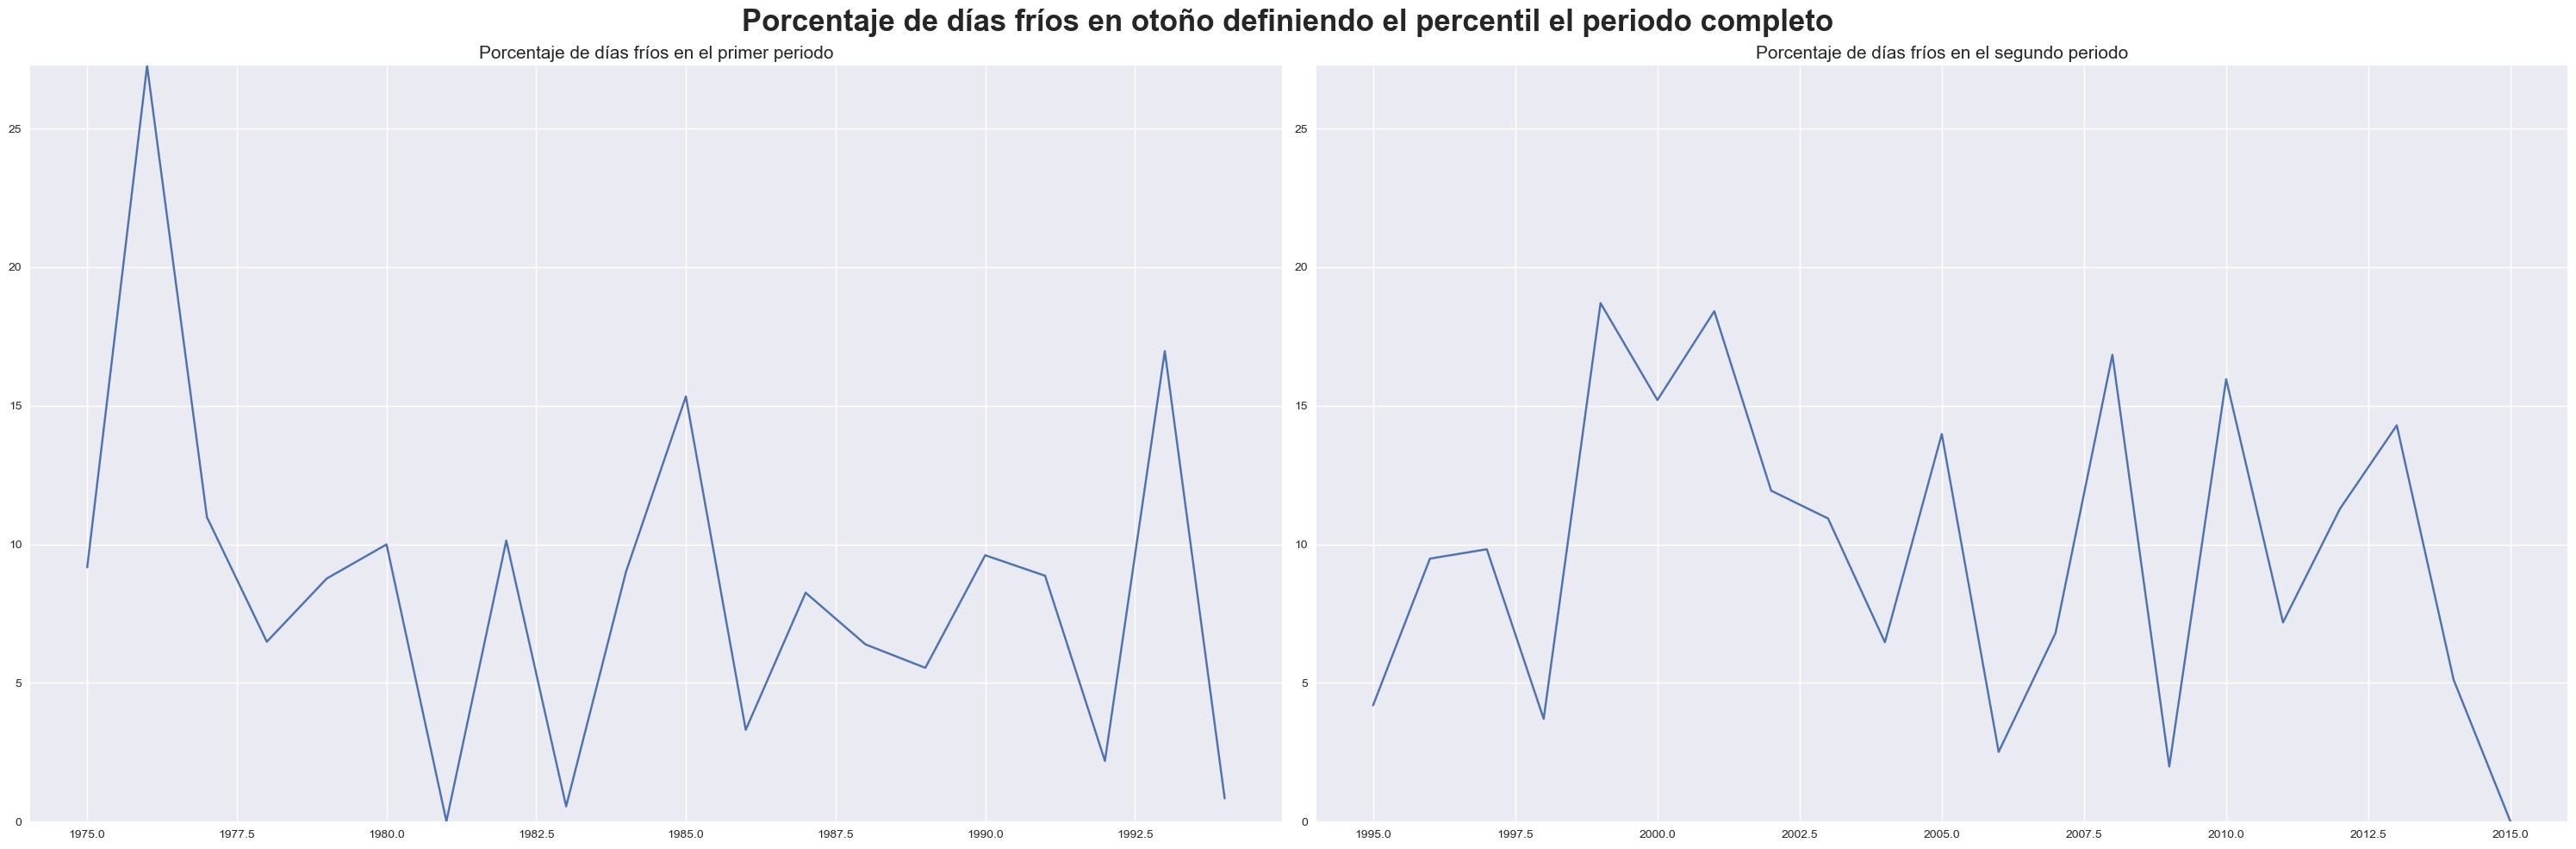

In [291]:
title= 'Porcentaje de noches frías en otoño definiendo el percentil el periodo completo'
title2= 'Porcentaje de días fríos en otoño definiendo el percentil el periodo completo'

cold_days_percentage(min_data_red, min_data_red_1, min_data_red_2,'SON',subtitle1,subtitle2,title)
cold_days_percentage(max_data_red, max_data_red_1, max_data_red_2,'SON',subtitle12,subtitle22,title2,cold_nights=False)

# Comparación con estación NOAA
A continuacón, procedemos a comparar los resultados obtenidos con una de las estaciones de la NOAA presentes en la región, concretamente, tomaremos los datos de la estación de Granada

In [292]:
station_name='GRANADA'
(maximas,minimas,daily,monthly,yearly)= readDataFrame(station_name)

Seleccionada la estacion GRANADA con código 084190-99999


In [293]:
maximas

year  month  day   temp  tempd      slp  windDir  windSpeed  cloud  \
0      1975      1    1  170.0   80.0  10351.0    180.0       41.0    0.0   
1      1975      1    2  160.0    0.0  10347.0      0.0        0.0    0.0   
2      1975      1    3  150.0   30.0  10331.0    170.0       41.0    0.0   
3      1975      1    4  140.0   30.0  10325.0    180.0       51.0    2.0   
4      1975      1    5  140.0   20.0  10360.0    180.0       21.0    1.0   
...     ...    ...  ...    ...    ...      ...      ...        ...    ...   
14966  2015     12   27  185.0   54.0  10330.0    270.0       62.0    6.0   
14967  2015     12   28  181.0   39.0  10318.0    310.0       36.0    8.0   
14968  2015     12   29  166.0  113.0  10349.0    360.0       41.0    8.0   
14969  2015     12   30  166.0   71.0  10349.0    360.0       67.0    9.0   
14970  2015     12   31  182.0   86.0  10314.0    340.0       10.0    7.0   

       pcp1h  pcp6h  
0        NaN    NaN  
1        NaN    NaN  
2        NaN    NaN  
3        NaN    NaN  
4        NaN    NaN  
...      ...    ...  
14966    NaN    0.0  
14967    NaN    0.0  
14968    NaN    6.0  
14969    NaN    0.0  
14970    NaN    0.0  

[14971 rows x 11 columns]

In [294]:
#Como necesitamos que los datos estén en el mismo formato, los dividiremos de la misma manera que los de la base de datos STEAD

scaling_factor_temp= 10
maximas = maximas.replace(-9999,np.NaN)
minimas = minimas.replace(-9999,np.NaN)

maximas['temp'] = maximas["temp"].apply(lambda x: x/scaling_factor_temp)
minimas['temp'] = minimas["temp"].apply(lambda x: x/scaling_factor_temp)

maxima_gran_1= maximas[['year','month','day','temp']][maximas['year']<1995]
maxima_gran_2= maximas[['year','month','day','temp']][maximas['year']>1994]

minima_gran_1= minimas[['year','month','day','temp']][minimas['year']<1995]
minima_gran_2= minimas[['year','month','day','temp']][minimas['year']>1994]

In [295]:
invierno1= minima_gran_1[['year','temp']][(minima_gran_1['month']<3)|(minima_gran_1['month']==12)].squeeze()
invierno2= minima_gran_2[['year','temp']][(minima_gran_2['month']<3)|(minima_gran_2['month']==12)].squeeze()

invierno12= maxima_gran_1[['year','temp']][(maxima_gran_1['month']<3)|(maxima_gran_1['month']==12)].squeeze()
invierno22= maxima_gran_2[['year','temp']][(maxima_gran_2['month']<3)|(maxima_gran_2['month']==12)].squeeze()
#Calculamos el cuantil con todo el periodo
alldata_inv= minimas[['year','temp']][(minimas['month']<3)|(minimas['month']==12)].squeeze()
cuantil_inv= np.quantile(alldata_inv['temp'],0.1)
alldata_inv2= maximas[['year','temp']][(maximas['month']<3)|(maximas['month']==12)].squeeze()
cuantil_inv2= np.quantile(alldata_inv2['temp'],0.1)

n_cold_days_inv_1= np.zeros(20)
n_cold_days_inv_2= np.zeros(21)

n_cold_nights_inv_1= np.zeros(20)
n_cold_nights_inv_2= np.zeros(21)

s=0
for i in range(1975,1995):
    n_cold_nights_inv_1[s]= np.sum(np.where(invierno1['temp'][invierno1['year']==i]<cuantil_inv,1,0),axis=0)
    n_cold_days_inv_1[s]= np.sum(np.where(invierno12['temp'][invierno12['year']==i]<cuantil_inv2,1,0),axis=0)
    s+=1

l=0    
for i in range(1995,2016):
    n_cold_nights_inv_2[l]= np.sum(np.where(invierno2['temp'][invierno2['year']==i]<cuantil_inv,1,0),axis=0)
    n_cold_days_inv_2[l]= np.sum(np.where(invierno22['temp'][invierno22['year']==i]<cuantil_inv2,1,0),axis=0)
    l+=1
    
n_days_inv= invierno1['temp'][invierno1['year']==1975].shape[0]
perc_cold_days_1_gran= (n_cold_days_inv_1/n_days_inv)*100
perc_cold_days_2_gran= (n_cold_days_inv_2/n_days_inv)*100
perc_cold_nights_1_gran= (n_cold_nights_inv_1/n_days_inv)*100
perc_cold_nights_2_gran= (n_cold_nights_inv_2/n_days_inv)*100

Text(0.5, 0.98, 'Porcentaje de días fríos en Granada en invierno definiendo el percentil el periodo completo')

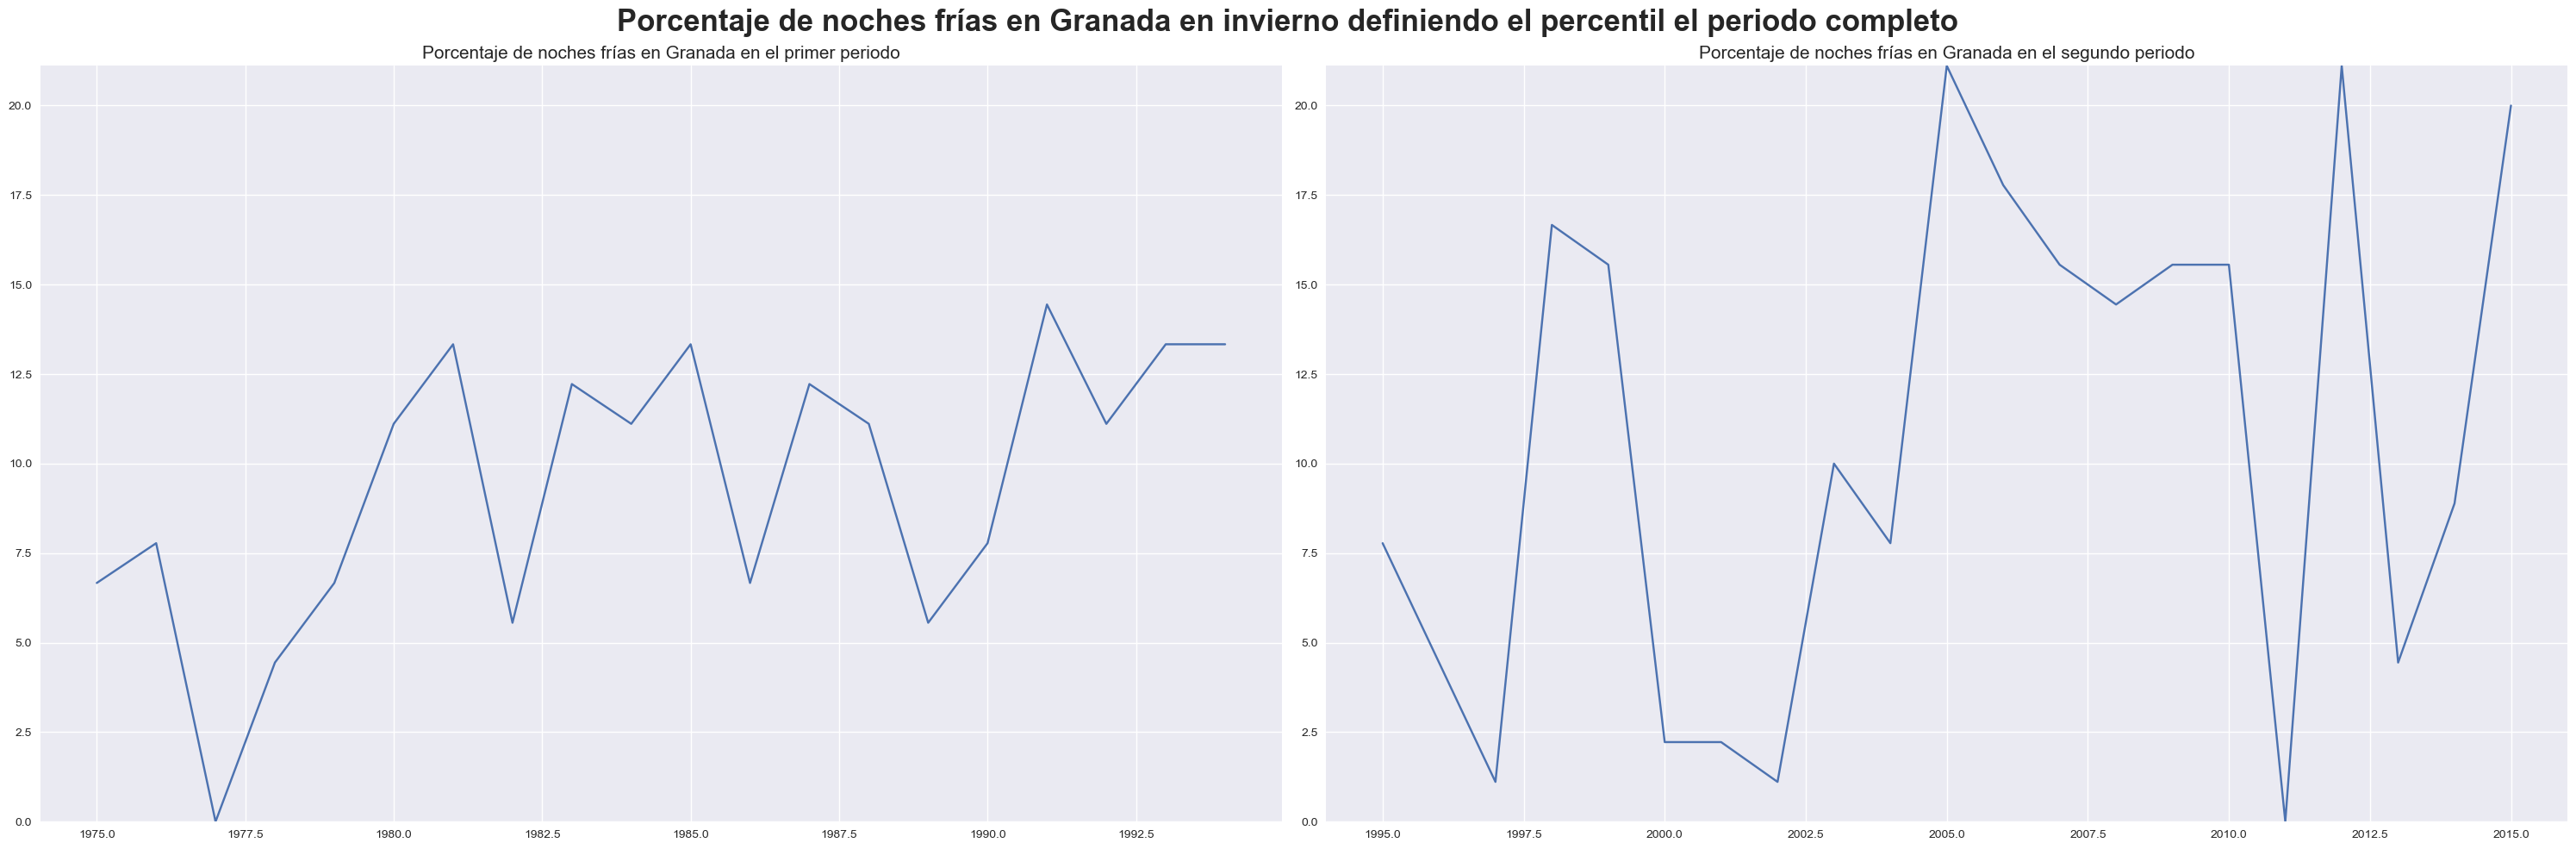

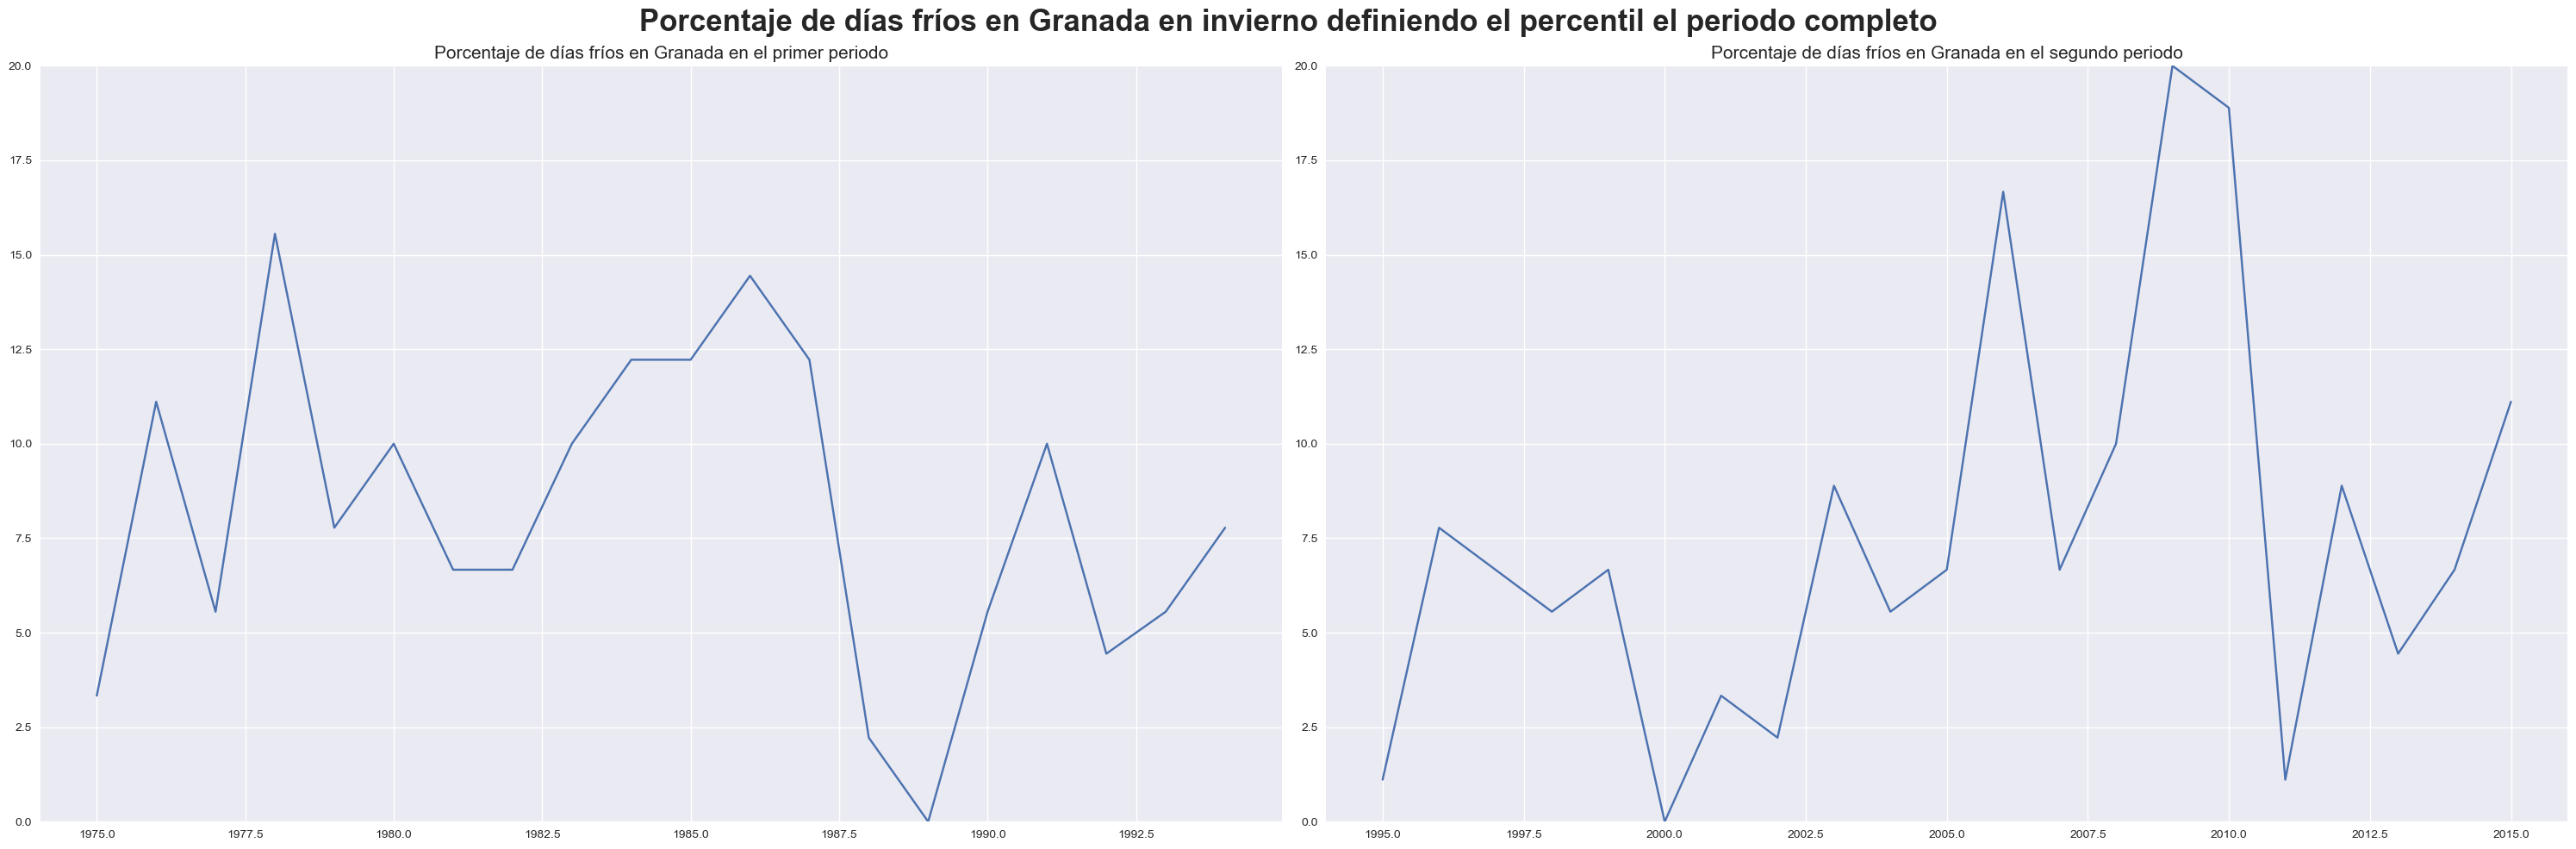

In [296]:
fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

period1= np.arange(1975,1995,1)
period2= np.arange(1995,2016,1)
ax1.plot(period1,perc_cold_nights_1_gran)
ax2.plot(period2,perc_cold_nights_2_gran)
maximo= np.max((np.max(perc_cold_nights_1_gran),np.max(perc_cold_nights_2_gran)))
minimo= np.min((np.min(perc_cold_nights_1_gran),np.min(perc_cold_nights_2_gran)))
ax1.set_ylim(minimo,maximo)
ax2.set_ylim(minimo,maximo)
ax1.set_title('Porcentaje de noches frías en Granada en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de noches frías en Granada en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de noches frías en Granada en invierno definiendo el percentil el periodo completo',fontsize=25, weight='bold')

fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

period1= np.arange(1975,1995,1)
period2= np.arange(1995,2016,1)
ax1.plot(period1,perc_cold_days_1_gran)
ax2.plot(period2,perc_cold_days_2_gran)
maximo= np.max((np.max(perc_cold_days_1_gran),np.max(perc_cold_days_2_gran)))
minimo= np.min((np.min(perc_cold_days_1_gran),np.min(perc_cold_days_2_gran)))
ax1.set_ylim(minimo,maximo)
ax2.set_ylim(minimo,maximo)
ax1.set_title('Porcentaje de días fríos en Granada en el primer periodo',fontsize=15)
ax2.set_title('Porcentaje de días fríos en Granada en el segundo periodo',fontsize=15)
fig.suptitle('Porcentaje de días fríos en Granada en invierno definiendo el percentil el periodo completo',fontsize=25, weight='bold')

# Ejercicio 2

En esta segunda parte, vamos a analizar el periodo de retorno de la señal, para ello, utilizaremos los índices definidos en el apartado anterior pero, en vez de usar las estaciones (seasons) y dividir el periodo en 2, para facilitar el análisis, usaremos una única serie temporal que incluirá todo los datos. De hecho, usaremos datos desde 1901 y definimos el cuantil tomando el periodo entre 1961 y 1990.

In [134]:
path= r"C:\Users\ideapad 5 15ITL05\Desktop\percent_cold_nights_S.nc"
diego= ((xr.open_dataarray(path)).mean(axis=1)).mean(axis=1)
diego

<xarray.DataArray (time: 114)>
array([5.326331  , 6.04057776, 3.17322813, 2.09660852, 4.20598849,
       5.38073465, 6.39049731, 2.84876058, 6.49662306, 2.83376208,
       6.84036142, 5.21811455, 3.44056503, 5.65702521, 6.18629046,
       3.65140759, 9.08163729, 6.22351401, 5.80187436, 2.57369718,
       3.76162384, 4.67653235, 7.18687222, 4.22857714, 8.75671524,
       3.72899074, 3.88965649, 3.62568289, 5.68215906, 6.08298261,
       7.51311233, 9.00828099, 6.80413777, 7.43743807, 5.29601585,
       3.72630919, 2.28945287, 3.57246094, 5.0764469 , 6.73419022,
       6.66078847, 4.32038614, 2.95261383, 9.11213424, 6.18170001,
       5.79837471, 2.43162047, 1.97984747, 2.24141222, 1.96603067,
       4.6333094 , 5.3947787 , 5.41909445, 6.69337612, 2.02475207,
       9.8821936 , 5.03531465, 4.27848124, 1.41363136, 2.92966158,
       1.42026706, 2.62869168, 2.81921808, 2.17710047, 3.80198344,
       3.28498968, 2.65759788, 2.61719283, 4.23262219, 5.87804856,
       6.50453137, 7.53415568, 6.79995637, 8.41724918, 7.09888102,
       6.88822027, 9.27170919, 6.11329776, 4.13690449, 6.12688731,
       5.16775595, 3.48628773, 4.31461399, 8.44488278, 4.7043023 ,
       5.1806183 , 3.48574233, 3.05401278, 1.40445046, 1.92144422,
       5.3287853 , 6.65783422, 6.92608012, 4.63162775, 3.12355128,
       4.12831444, 1.74073502, 3.48265173, 3.77462254, 3.33312123,
       2.81490033, 1.91294507, 2.13615002, 3.87602149, 7.34658352,
       2.60487588, 2.98542873, 3.78030379, 1.98939197, 3.14295843,
       1.37608966, 5.0650844 , 4.57281545, 1.18683586])
Coordinates:
    percentiles  int32 ...
  * time         (time) datetime64[ns] 1901-01-01 1902-01-01 ... 2014-01-01

a
b


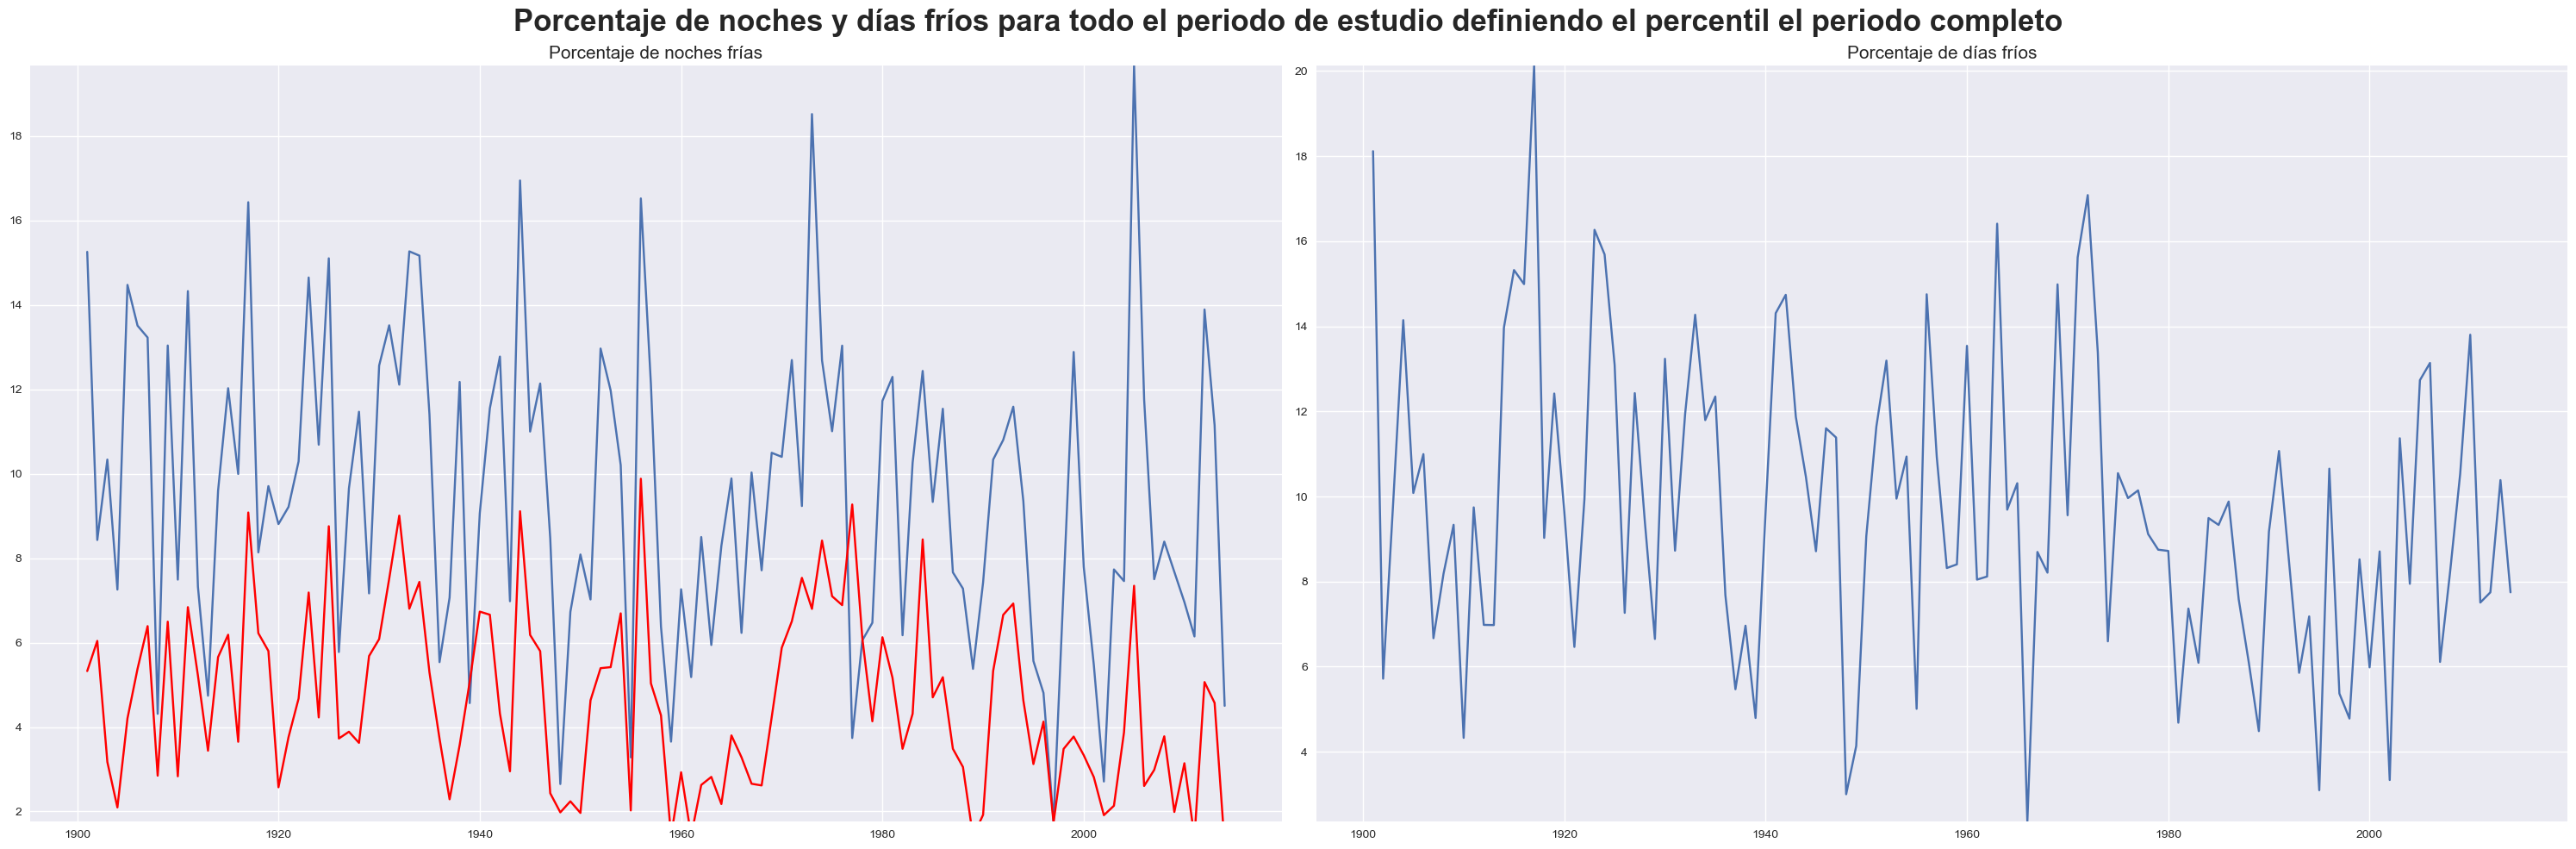

In [298]:
#diego= correct_series(xr.open_dataarray(min_data))
max_data_red= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]))
min_data_red= min_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]))

max_data_red_percentil= max_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1961','1990'))
min_data_red_percentil= min_data.sel(lon=slice(lon_lims[0],lon_lims[1]),lat=slice(lat_lims[0],lat_lims[1]),Time=slice('1961','1990'))

alldata_min= min_data_red.tn
alldata_max= max_data_red.tx

cuantil_min= np.quantile(min_data_red_percentil.tn,0.1,axis=0)
cuantil_max= np.quantile(max_data_red_percentil.tx,0.1,axis=0)

n_cold_nights= np.zeros(114)
n_cold_days= np.zeros(114)

print('a')
s=0
for i in range(1901,2015):
    a= np.sum(np.where(alldata_min[alldata_min['Time.year']==i]<cuantil_min,1,0),axis=0)
    n_cold_nights[s]= np.nanmean(np.where(np.isnan(alldata_min[alldata_min['Time.year']==i]),np.nan,a))
    
    b= np.sum(np.where(alldata_max[alldata_max['Time.year']==i]<cuantil_max,1,0),axis=0)
    n_cold_days[s]= np.nanmean(np.where(np.isnan(alldata_max[alldata_max['Time.year']==i]),np.nan,b))
    
    #n_cold_nights[s]= np.mean(np.sum(np.where(alldata_min[alldata_min['Time.year']==i]<cuantil_min,1,0),axis=0))
    #n_cold_days[s]= np.mean(np.sum(np.where(alldata_max[alldata_max['Time.year']==i]<cuantil_max,1,0),axis=0))
    s+=1
    
print('b')
n_days_year= 365
perc_cold_nights= (n_cold_nights/n_days_year)*100
perc_cold_days= (n_cold_days/n_days_year)*100

fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

period= np.arange(1901,2015,1)

ax1.plot(period,perc_cold_nights)
ax1.plot(period,diego,'r')
ax2.plot(period,perc_cold_days)
maximo_night= np.max(perc_cold_nights)
minimo_night= np.min(perc_cold_nights)
maximo_day= np.max(perc_cold_days)
minimo_day= np.min(perc_cold_days)

ax1.set_ylim(minimo_night,maximo_night)
ax2.set_ylim(minimo_day,maximo_day)
ax1.set_title('Porcentaje de noches frías',fontsize=15)
ax2.set_title('Porcentaje de días fríos',fontsize=15)
fig.suptitle('Porcentaje de noches y días fríos para todo el periodo de estudio definiendo el percentil el periodo completo',fontsize=25, weight='bold')
fig.savefig('Porcentaje de noches y días fríos para todo el periodo de estudio definiendo el percentil el periodo completo.png')

C:\Users\ideapad 5 15ITL05\AppData\Local\Temp\ipykernel_64620\2298658326.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perc_cold_nights, ax=ax1)
C:\Users\ideapad 5 15ITL05\AppData\Local\Temp\ipykernel_64620\2298658326.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perc_cold_days, ax=a

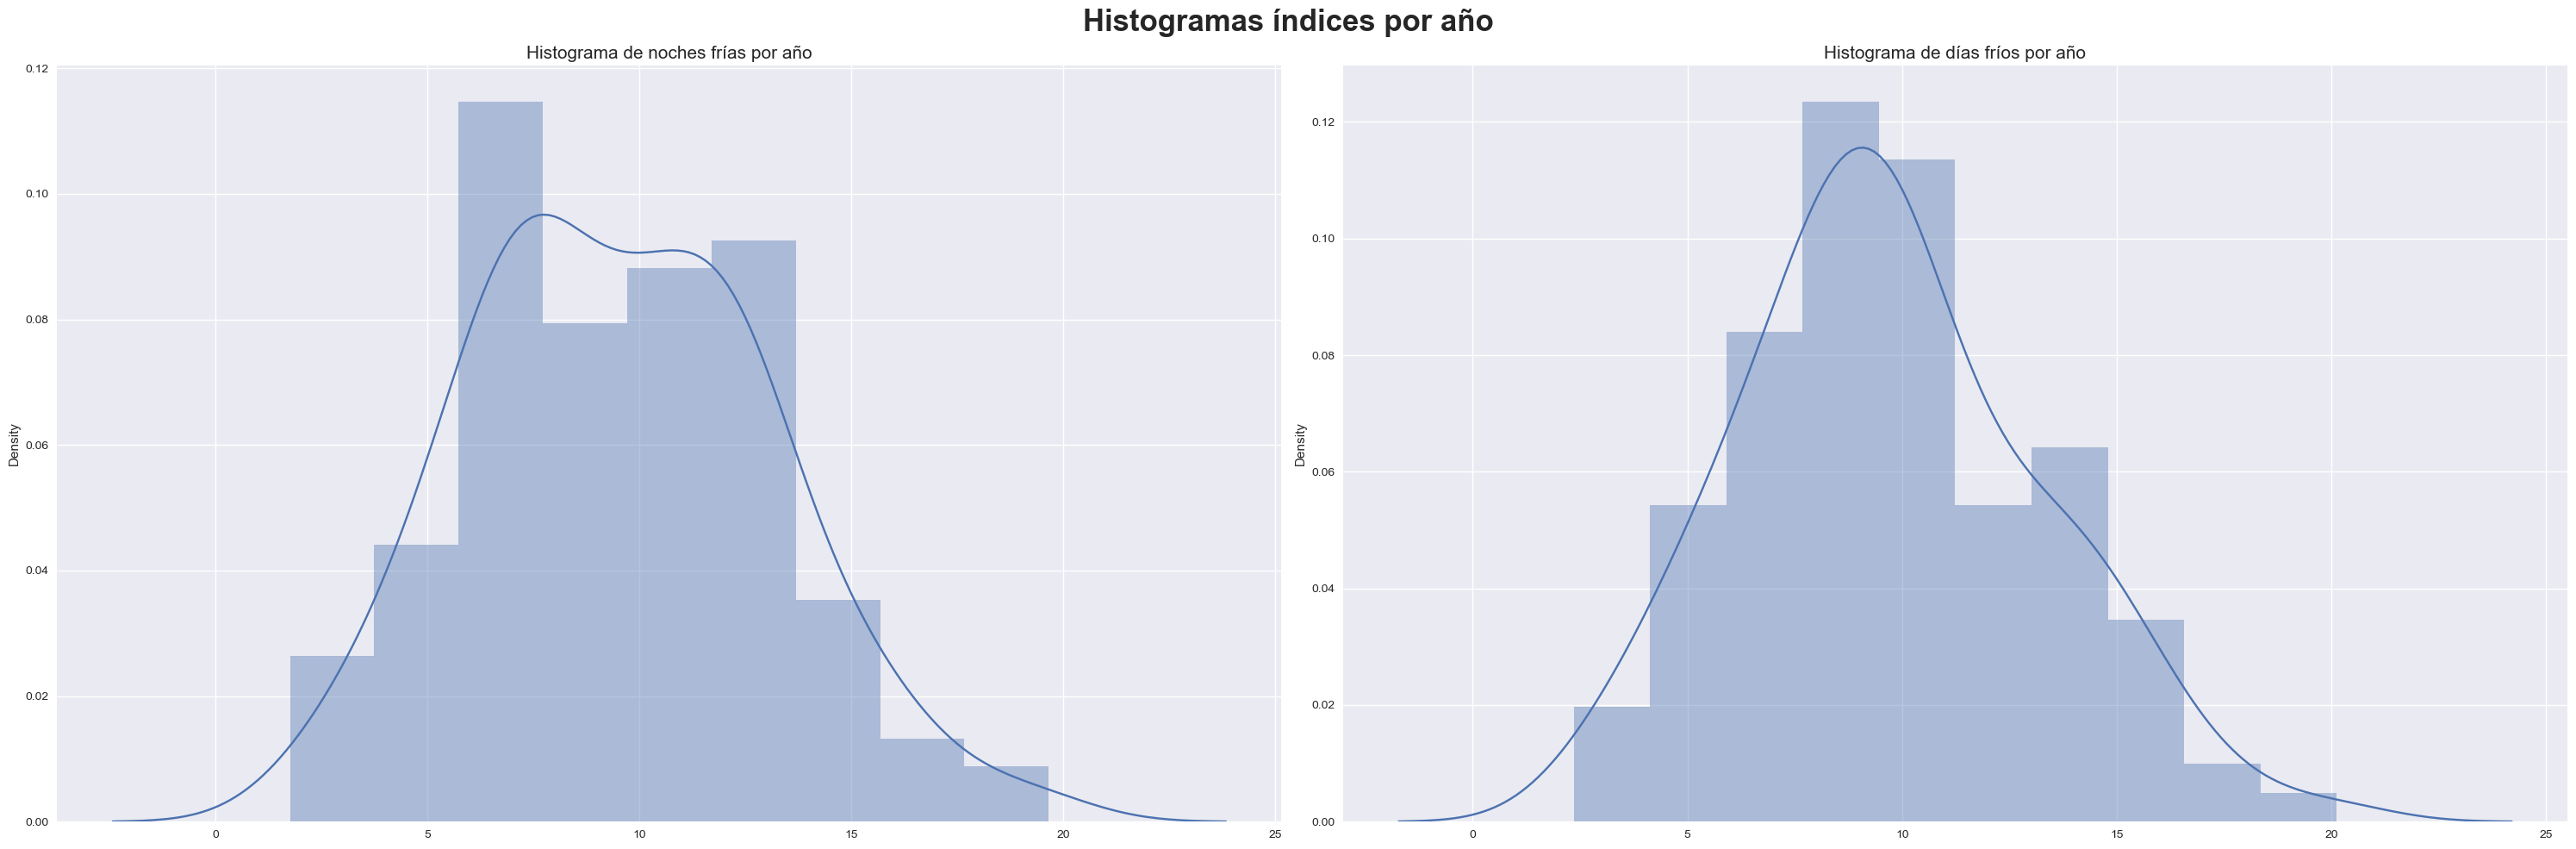

In [299]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(30,10), tight_layout=True) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.distplot(perc_cold_nights, ax=ax1)
sns.distplot(perc_cold_days, ax=ax2)
ax1.set_title('Histograma de noches frías por año',fontsize=15)
ax2.set_title('Histograma de días fríos por año',fontsize=15)
fig.suptitle('Histogramas índices por año',fontsize=25, weight='bold')
fig.savefig('Histograma de días y noches frías.png')

Vamos a hacer un análisis armónico de la señal (ajuste GEV).

In [300]:
#Una vez tenemos hechas las series temporales, que es lo que buscábamos, podemos calcular los periodos de retorno de la señal.
#Usaremos para ello las funciones definidas en el cuaderno de clase.

def nor(mu,sigma,x):
    #Nota: también podrías usar la función norm.pdf(x,k) del módulo stats del paquete scipy
    N=1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
    return N

def GEV(x,c):
    #Función que calcula la función densidad de probabilidad de Generalized Extrem Value normalizada
    # con m = 0, s = 1
    #nota: también puedes usar g=stats.genextreme.pdf(x,-c)
    if ( abs(c) < 0.005 ) :
        g = np.exp(-np.exp(-x))*np.exp(-x)
    else:
        g = ( np.power( 1 + c * x , -1-1/c) ) * np.exp( - np.power(1 + c * x ,-1/c) )
    return g

def GEVms(x,c,m,s):
    #Función que calcula la función de densidad de probabilidad Generalizada Extreme Value sin normalizar
    y = ( x - m ) / s
    if ( abs(c) < 0.005 ) :
        g = ( np.exp(-np.exp(-y))*np.exp(-y) ) / s
    else:
        g = ( np.power( 1 + c * y , -1-1/c) ) * np.exp( - np.power(1 + c * y ,-1/c) ) / s
    return g

def GPDs(y,c,s):
    #Función que calcula la función de densidad de probabilidad de Pareto Generalizada 
    if (abs(c)<0.0001):
        h = np.exp(-y/s)*(1/s)
    else:
        h = (1/s) * ( 1 + c * y / s) ** (-1-1/c)
    h[y<=0]=0
    return h

def MLE_GEV(c,m,s,x):
    #Función que calcula la función likelihood sobre GEV con 
    #los parámetros de entrada c,m,s
    #y la muestra de datos x
    if ( (s < 0) | np.any(1 + c * (x-m)/s ) < 0):
        sal=1e7
    else:            
        if (abs(c) > 0.00001 ):
            t = (1 + c * (x-m)/s )**(-1/c)
        else :
            t = np.exp(-(x-m)/s)
        f = - np.log(s) + (c +1)*np.log(t) -t
        sal = f.sum()
    return -sal


def returnLevel(p, c,m,s):
    if (abs(c) > 0.00001 ):
        zp = m - ( s / c ) * ( 1 - ( - np.log( 1 - p ) ) ** ( - c ))
    else :
        zp = m - s * np.log( - np.log( 1 - p ) )
    return zp


def densityPlotGEV(ax,x,c,m,s):
    n, bins, dummy = ax.hist(x,density=True,label='Empirica')
    x1, x2 = 2*bins[0] - bins[1], 2* bins[-1] - bins[-2]
    ax.set_xlim(x1,x2)
    x_x = np.linspace(x1,x2,200)
    y_y = GEVms(x_x,c,m,s)
    ax.plot(x_x,y_y,'r',label='Ajuste')
    ax.legend()
    ax.grid()
    ax.set_ylabel('probabilidad f(z)')
    ax.set_xlabel('z')
    return

def probabilityPlot(ax,pExp,pTeor):
    ax.plot([0,1],[0,1])
    ax.plot(pExp,pTeor,'o')
    ax.set_ylabel('Model')
    ax.set_xlabel('Empirical')
    ax.set_title('Probability plot')
    ax.grid()
    return

def quantilePlot(ax,xTeor,xSort):
    ax.plot([xSort[0],xSort[-1]],[xSort[0],xSort[-1]])
    ax.plot(xTeor,xSort,'o')
    ax.set_ylabel('Model')
    ax.set_xlabel('Empirical')
    ax.set_title('Quantile plot')
    ax.grid()
    return

def returnPlot(ax,p,zp,pExp,xSort):
    ax.semilogx(1/p,zp)
    ax.grid()
    ax.set_xlim(1e-1,1e3)
    ax.semilogx(1/pExp,xSort,'o')
    ax.set_title('Return level plot')
    ax.set_xlabel('Return period (years)')
    ax.set_ylabel('Return level')
    return
    
def diagnosticsGEV(x,c,m,s):
    y = (x-m)/s
    ySort = np.sort(y)
    pExp = np.arange(1,ySort.size+1,1)/(ySort.size+1)
    pTeor = stats.genextreme.cdf(ySort,-c)
    xSort = np.sort(x)
    pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1)
    pExpinv = np.arange(xSort.size+1,1,-1)/(xSort.size+1)
    xTeor = returnLevel(1-pExp, c,m,s)    
    p = np.logspace(-2, -1e-2, 100)
    zp=returnLevel(p,c,m,s)
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    probabilityPlot(ax[0,0],pExp,pTeor)
    quantilePlot(ax[0,1],xTeor,xSort)
    returnPlot(ax[1,0],p,zp,pExpinv,xSort)
    densityPlotGEV(ax[1,1],x,c,m,s)
    fig.suptitle('Diagnostics',weight='bold',fontsize=18)
    return

def diagnosticsGPD(x,c,m,s,numYears):
    fig, ax = plt.subplots(2, 2, figsize=(14,10))
    fig.suptitle('Diagnostics',weight='bold',fontsize=18)
    xSort = np.sort(x)
    pExp = np.arange(1,xSort.size+1,1)/(xSort.size+1)
    pExpinv = np.arange(xSort.size+1,1,-1)/(xSort.size+1)
    rv = stats.genpareto(c,m,s)
    pTeor = rv.cdf(xSort)
    xTeor = rv.ppf(pExp)
    fac = x.size / numYears
    p = np.logspace(-4, 2 , 100)
    zp = rv.ppf(1-p)
    fac = x.size / numYears
    returnPlot(ax[1,0],p*fac,zp,pExpinv*fac,xSort)
    probabilityPlot(ax[0,0],pExp,pTeor)
    quantilePlot(ax[0,1],xTeor,xSort)
    densityPlotGPD(ax[1,1],x,c,m,s)
    return

def densityPlotGPD(ax,x,c,m,s):
    n, bins, dummy = ax.hist(x,density=True,label='Empirica')
    x1, x2 = 2*bins[0] - bins[1], 2* bins[-1] - bins[-2]
    ax.set_xlim(x1,x2)
    x_x = np.linspace(x1,x2,200)
    y_y = stats.genpareto.pdf(x_x,c,m,s)
    ax.plot(x_x,y_y,'r',linewidth = 4, label='Ajuste')
    ax.legend()
    ax.grid()
    ax.set_ylabel('probabilidad h(x)')
    ax.set_xlabel('x')
    return

def runningMean(x,T):
    y = x.copy() * np.NaN
    N = x.size
    ini = int((T-1)/2)
    fin = int(T/2)
    for i in range(ini,N-fin):
        y[i] = np.mean(x[i-ini:i+fin+1])
    return y


def espectroArmonico(x,At):
    x = np.squeeze(np.array(x))
    N = x.size 
    xm = x.mean()
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    jvec=np.arange(1,N+1)
    a = np.zeros(Nmax)
    b = np.zeros(Nmax)
    xa = x-xm
    fac = 2*np.pi*jvec/N
    for k in range(Nmax):
        a[k] = 2 / N * np.sum( np.matmul(xa,np.cos(fac*(k+1)) ))
        b[k] = 2 / N * np.sum( np.matmul(xa,np.sin(fac*(k+1)) ))
    if (N%2)==0: b[Nmax-1]=0
    kvec = np.arange(1,Nmax+1)
    # Habría que dividir entre 4, pero como sólo damos la parte positiva, para
    # que la suma de G nos aporte la varianza dividimos sólo entre 2
    G = ( a**2+b**2 ) / 2
    f = kvec/(N*At)
    return f,G

def espectroFFT(x,At):
    x = np.squeeze(np.array(x))
    N=x.size
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    y = fft(x)
    ap = 2/N*np.real(y[1:Nmax+1])
    bp =  - 2/N*np.imag(y[1:Nmax+1])
    xm = np.mean(x)
    kvec = np.arange(1,Nmax+1)
    # Habría que dividir entre 4, pero como sólo damos la parte positiva, para
    # que la suma de G nos aporte la varianza dividimos sólo entre 2
    G = ( ap**2+bp**2 ) / 2
    f = kvec/(N*At)
    return f,G

def redSpectra(a,s2):
    f = np.arange(.0,.51,.01)
    N = f.size
    G = (s2*(1-a**2))/(1+a**2-2*a*np.cos(2*np.pi*f))
    #Hay que multiplicar por 2 porque sólo sacamos la parte positiva
    return f,2*G

def ajusteArmonico(x,numArm):
    x = np.squeeze(np.array(x))
    N = x.size 
    xm = x.mean()
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    jvec=np.arange(1,N+1)
    a = np.zeros(Nmax)
    b = np.zeros(Nmax)
    xa = x-xm
    fac = 2*np.pi*jvec/N
    for k in range(Nmax):
        a[k] = 2 / N * np.sum( np.matmul(xa,np.cos(fac*(k+1)) ))
        b[k] = 2 / N * np.sum( np.matmul(xa,np.sin(fac*(k+1)) ))
    if (N%2)==0: b[Nmax-1]=0
    kvec = np.arange(1,Nmax+1)
    xhat = np.zeros(N)
    n = np.min([numArm,Nmax])
    for j in range(N):
        xhat[j] =  xm + np.sum( a[:n] * np.cos (2*np.pi*kvec[:n]*(j+1)/N) + b[:n] *
                               np.sin (2*np.pi*kvec[:n]*(j+1)/N) )
    return xhat,a,b

def ajusteArmonicoFFT(x,numArm):
    x = np.squeeze(np.array(x))
    N=x.size
    Nmax = int(N/2) if (N % 2) == 0 else int((N-1)/2)
    y = fft(x)
    ap = 2/N*np.real(y[1:Nmax+1])
    bp =  - 2/N*np.imag(y[1:Nmax+1])
    xm = np.mean(x)
    kvec = np.arange(1,Nmax+1)
    xhat = np.zeros(N)
    n = np.min([numArm+1,Nmax])
    for j in range(N):
        xhat[j] =  xm + np.sum( ap[:n] * np.cos (2*np.pi*kvec[:n]*(j)/N) + bp[:n] * 
                               np.sin (2*np.pi*kvec[:n]*(j)/N) )
    return xhat,ap,bp

def calculoAR1(x):
    xm = np.mean(x)
    N = x.size
    cor = stattools.acf(x, fft=False, nlags = 1) * N/(N-1)
    a = cor[1]
    sx = np.std(x, ddof=1)
    fac = np.sqrt((N-1)/(N-2)*(1-a**2))*sx
    AR1 = x * np.NaN
    rng = np.random.default_rng()
    Z = rng.normal(0,1,N)
    #También podéis generar el ruido blanco con stats de scipy
    #Z = stats.norm.rvs(size=N)
    AR1[0] = Z[0]
    for i in range(N-1):
        AR1[i+1] =  a * ( AR1[i] ) + fac * Z[i+1]
    return AR1 + xm


def calculoAutocov(x,nlag):
    cov = np.zeros([nlag+1])
    N = x.size
    xm = np.mean(x)
    ax = x-xm
    for t in range(nlag+1):
        cov[t] = np.sum(ax[:N-t]*ax[t:])/(N-1)
    return cov

# Noches frías

MLE =305.945
c=-0.200
m=8.172
s=3.385
100 yr return value = 18.360


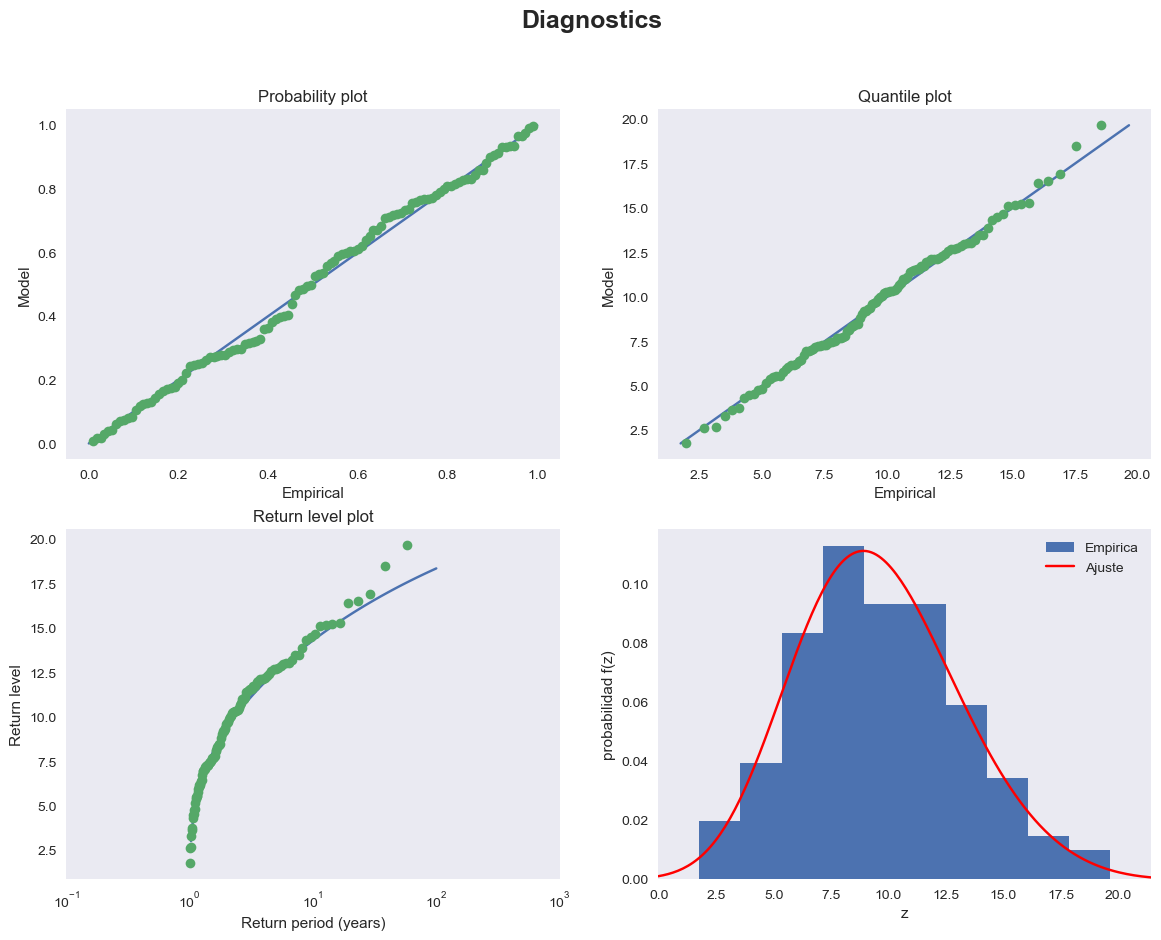

In [301]:
#Ajuste usando herramienta de scipy:
import scipy.stats as stats
x = perc_cold_nights
c, m, s = stats.genextreme.fit(x)
c = - c
print('MLE ='+'%.3f'%(MLE_GEV(c,m,s,x)))
print('c='+'%.3f'%(c))
print('m='+'%.3f'%(m))
print('s='+'%.3f'%(s))
print('100 yr return value = '+'%.3f'%(returnLevel(0.01,c,m,s)))
diagnosticsGEV(x,c,m,s)

# Días Fríos

MLE =302.618
c=-0.174
m=8.322
s=3.241
100 yr return value = 18.580


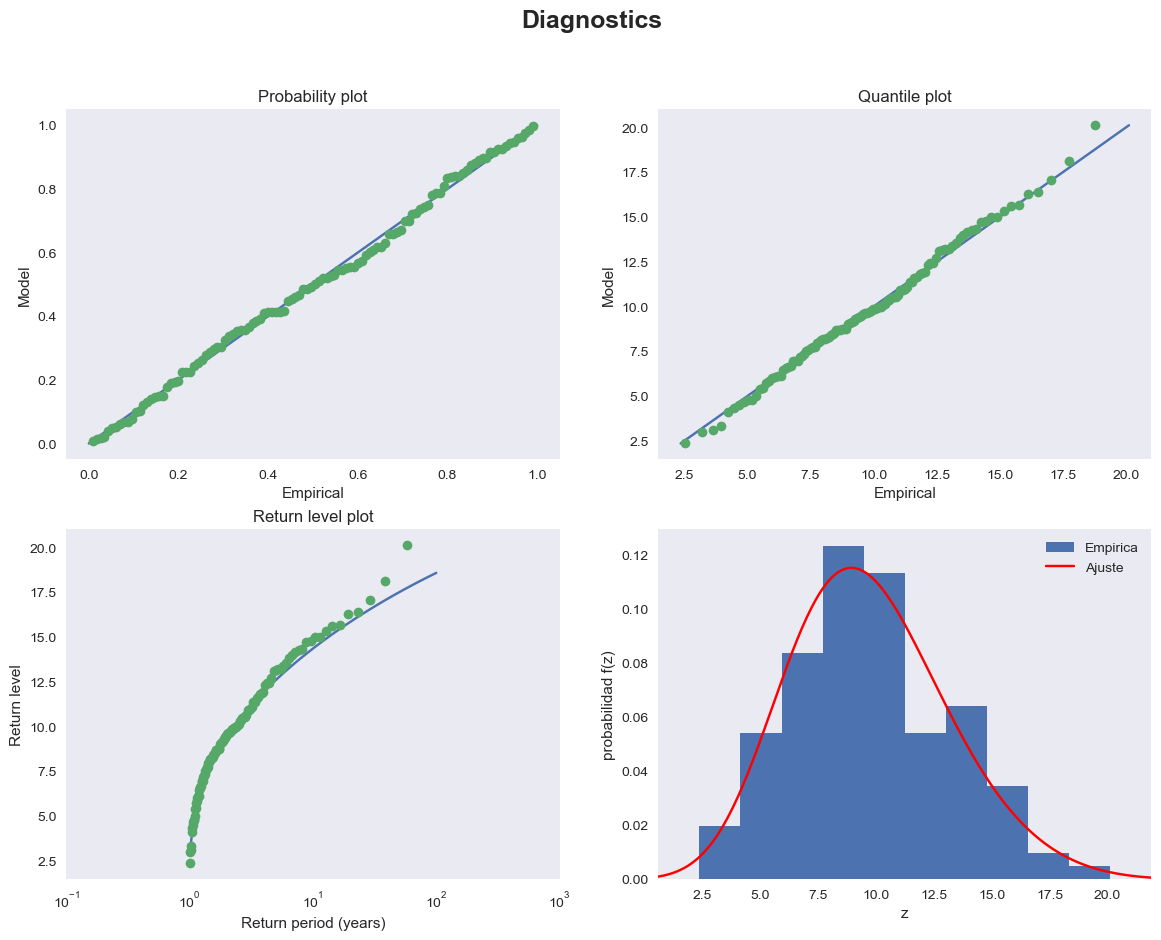

In [302]:
#Ajuste usando herramienta de scipy:
import scipy.stats as stats
x = perc_cold_days
c, m, s = stats.genextreme.fit(x)
c = - c
print('MLE ='+'%.3f'%(MLE_GEV(c,m,s,x)))
print('c='+'%.3f'%(c))
print('m='+'%.3f'%(m))
print('s='+'%.3f'%(s))
print('100 yr return value = '+'%.3f'%(returnLevel(0.01,c,m,s)))

diagnosticsGEV(x,c,m,s)

# Periodogramas

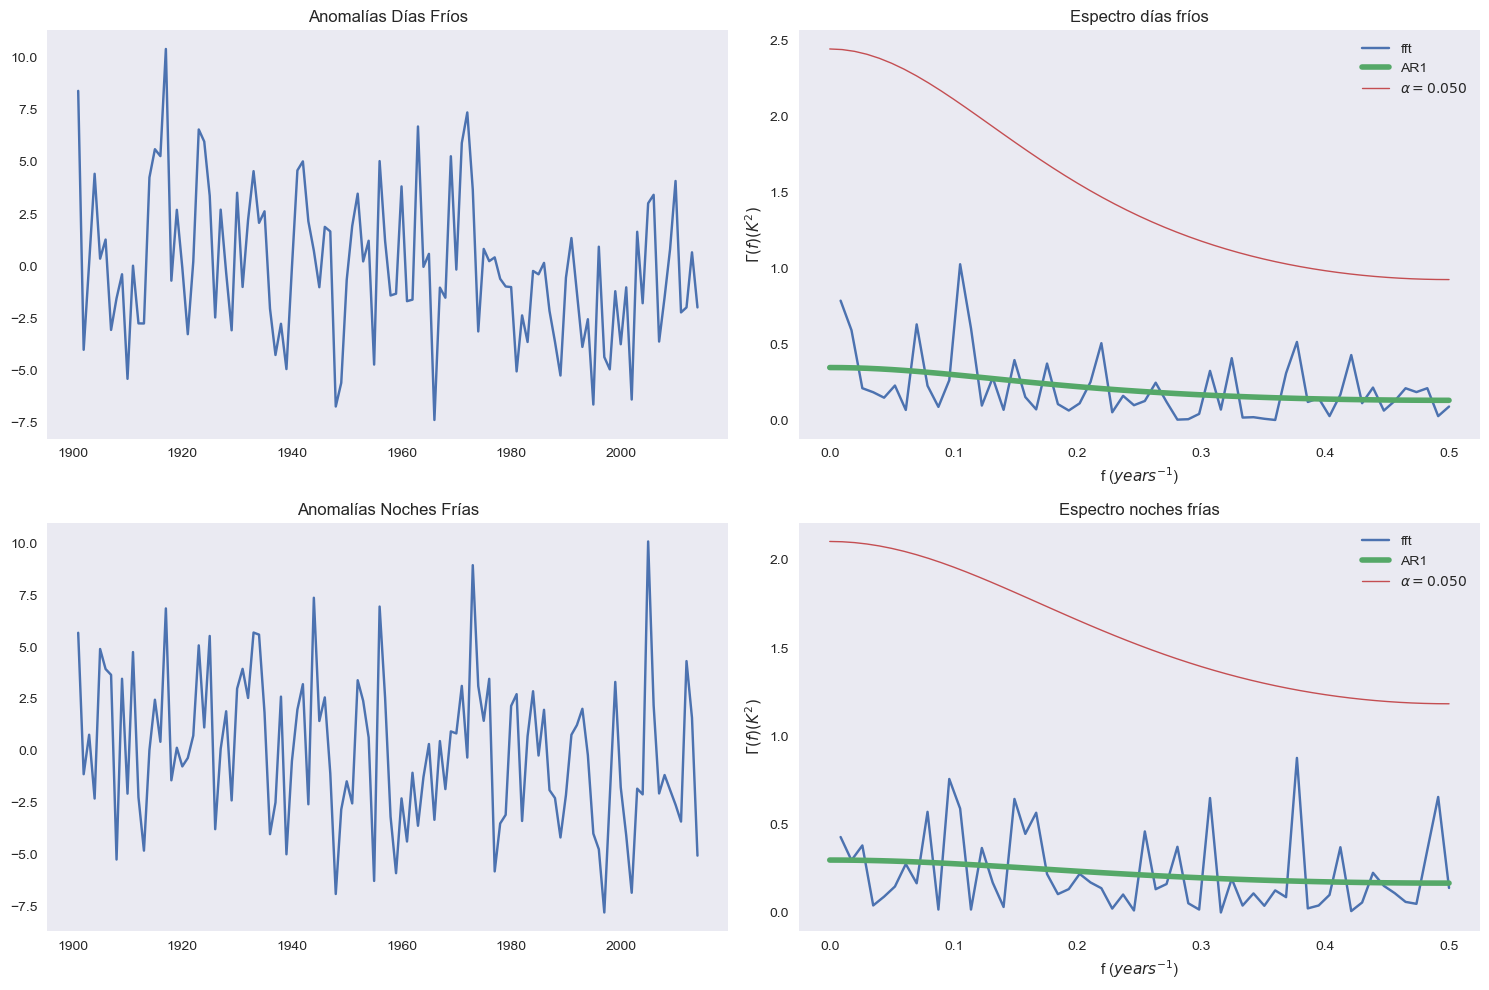

In [316]:
#Esta serie tiene mucha tendencia. Mejor quitarla para hacer la serie estacionaria:
#con la serie obtenida, has de calcular la media estacional y
#restarle la climatología (media de la serie para todo el periodo)
#x = signal.detrend(np.squeeze(np.array(perc_cold_days)))
x_day= (np.squeeze(np.array(perc_cold_days)))-np.mean(np.squeeze(np.array(perc_cold_days)))
x_night= (np.squeeze(np.array(perc_cold_nights)))-np.mean(np.squeeze(np.array(perc_cold_nights)))

time= period
fig,((ax0,ax1),(ax2,ax3))=plt.subplots(2,2,figsize=(15,10),tight_layout=True)

ax0.plot(time,x_day)
ax0.grid()
ax0.set_title('Anomalías Días Fríos')

ax2.plot(time,x_night)
ax2.grid()
ax2.set_title('Anomalías Noches Frías')

fa_day,Ga_day = espectroArmonico(x_day,1)
ff_day,Gf_day = espectroFFT(x_day,1)
#ax1.plot(fa_day,Ga_day,linewidth=4)
ax1.plot(ff_day,Gf_day,label='fft')
ax1.grid()
ax1.set_ylabel(r'$\Gamma(f) (K^2)$')
ax1.set_xlabel(r'f ($years^{-1}$)')
ax1.set_title('Espectro días fríos')
[np.var(x_day),np.sum(Ga_day),np.sum(Gf_day)]

fa_night,Ga_night = espectroArmonico(x_night,1)
ff_night,Gf_night = espectroFFT(x_night,1)
#ax3.plot(fa_night,Ga_night,linewidth=4)
ax3.plot(ff_night,Gf_night,label='fft')
ax3.grid()
ax3.set_ylabel(r'$\Gamma(f) (K^2)$')
ax3.set_xlabel(r'f ($years^{-1}$)')
ax3.set_title('Espectro noches frías')
[np.var(x_night),np.sum(Ga_night),np.sum(Gf_night)]

#Veamos si los picos sobresalen lo suficiente:
alpha_day = 0.05
alphaS_day = alpha_day / Gf_day.size
nu_day = 2
chi2_day = stats.chi2.ppf(1-alphaS_day,2)
s2_day = np.var(x_day)
N= x_day.size
cor_day = stattools.acf(x_day, fft=False, nlags = 1) * N/(N-1)
a_day = cor_day[1]
f_day,G_day = redSpectra(a_day,s2_day)
ax1.plot(f_day,G_day/x_day.size,linewidth=4,label='AR1')
Gmax_day = G_day/x_day.size/nu_day*chi2_day
ax1.plot(f_day,Gmax_day,linewidth=1,label=r'$\alpha = %.3f$'%alpha_day)
a_day,s2_day,chi2_day
ax1.legend()

#Veamos si los picos sobresalen lo suficiente:
alpha_night = 0.05
alphaS_night = alpha_night / Gf_night.size
nu_night = 2
chi2_night = stats.chi2.ppf(1-alphaS_night,2)
s2_night = np.var(x_night)
N= x_night.size
cor_night = stattools.acf(x_night, fft=False, nlags = 1) * N/(N-1)
a_night = cor_night[1]
f_night,G_night = redSpectra(a_night,s2_night)
ax3.plot(f_night,G_night/x_night.size,linewidth=4,label='AR1')
Gmax_night = G_night/x_night.size/nu_night*chi2_night
ax3.plot(f_night,Gmax_night,linewidth=1,label=r'$\alpha = %.3f$'%alpha_night)
a_night,s2_night,chi2_night
ax3.legend()
fig.savefig('Periodogramas indices.png')

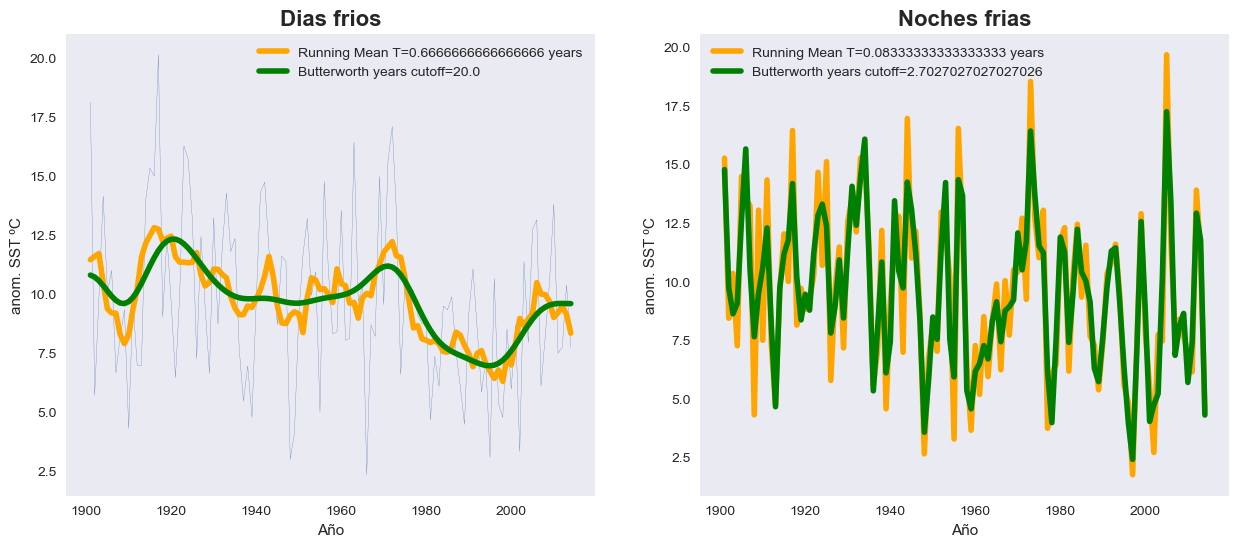

In [325]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

# La señal inicial
x = np.squeeze(np.array(perc_cold_days))
t = np.squeeze(np.array(period))
N = x.size
ax1.plot(t,x,linewidth=0.2)


#Voy a usar la condición mínima derivada en ambos extremos:
xtot = np.append(np.flip(x),[x,np.flip(x)])

# frecuencia de corte (en años) (pico en 0.11 años^-1):
nyc = 1/0.05
Tc = nyc * 1
fc = 1 / Tc

#Media móvil: necesito una ventana de aprox. Tc/0.443
Window = int(0.433/fc)
#Window = Tc

#Filtro la señal ampliada y luego me quedo con el trozo central
ytot = runningMean(xtot,Window)
yRunningMean = ytot[N:2*N]


#Filtro de Butterworth, escogemos orden nominal 4
#Cuidado que el filtro de Butter tiene la frecuencia normalizada con 1 correspondiendo a fmax=FNyquist
n = 4
b,a = signal.butter(n,fc*2,output='ba')
#Filtro la señal ampliada y me quedo con la parte central:
ytot = signal.filtfilt(b,a,xtot)
yButter = ytot[N:2*N]


ax1.grid()
ax1.set_title('Dias frios',fontsize=16,weight='bold')
ax1.set_xlabel('Año')
ax1.set_ylabel('anom. SST ºC')
ax1.plot(t,yRunningMean,linewidth= 4,color='orange',label='Running Mean T='+str(Window/12)+' years')
ax1.plot(t,yButter,linewidth= 4,color='green',label='Butterworth years cutoff='+str(nyc))
ax1.legend()

# La señal inicial
x = np.squeeze(np.array(perc_cold_nights))
t = np.squeeze(np.array(period))
N = x.size
ax2.plot(t,x,linewidth=0.2)


#Voy a usar la condición mínima derivada en ambos extremos:
xtot = np.append(np.flip(x),[x,np.flip(x)])

# frecuencia de corte (en años) (pico en 0.37 años^-1):
nyc = 1/0.37
Tc = nyc * 1
fc = 1 / Tc


#Media móvil: necesito una ventana de aprox. Tc/0.443
Window = int(0.433/fc)
#Window = Tc

#Filtro la señal ampliada y luego me quedo con el trozo central
ytot = runningMean(xtot,Window)
yRunningMean = ytot[N:2*N]


#Filtro de Butterworth, escogemos orden nominal 4
#Cuidado que el filtro de Butter tiene la frecuencia normalizada con 1 correspondiendo a fmax=FNyquist
n = 4
b,a = signal.butter(n,fc*2,output='ba')
#Filtro la señal ampliada y me quedo con la parte central:
ytot = signal.filtfilt(b,a,xtot)
yButter = ytot[N:2*N]


ax2.grid()
ax2.set_title('Noches frias',fontsize=16,weight='bold')
ax2.set_xlabel('Año')
ax2.set_ylabel('anom. SST ºC')
ax2.plot(t,yRunningMean,linewidth= 4,color='orange',label='Running Mean T='+str(Window/12)+' years')
ax2.plot(t,yButter,linewidth= 4,color='green',label='Butterworth years cutoff='+str(nyc))
ax2.legend()
